In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
# Read the data 
data = pd.read_csv('C:/Users/admin/Desktop/Machine Learning journal/VLagun_SHAP_2_cyano.csv')

# Drop null values 
data.dropna(inplace=True)
# Prepare X and Y 
X = pd.get_dummies(data)
X.drop(['Cyanobacteria'], inplace=True, axis=1)

X.head()

,Salinity,O2,SRP,DOP,PP,NH4N,NO3N,DON,PN,Fe,SiO4Si,DOC,TPOC,Chlorophyta,Diatoms,picophytoplankton,Water temp.,Wind speed,Depth,SS
0,3.757624,9.46,3.5,11.7,185.0,0.039,0.022,0.551,0.759,0.0121,2.3112,7.500,8.5650,3.08,0.230,3.20,18.3,3.5,3.3,52.0
1,3.504707,9.89,4.4,17.5,111.3,0.020,0.025,0.123,1.181,0.0136,2.1157,7.860,8.5200,2.87,0.010,2.42,19.1,0.0,3.6,50.0
2,3.721493,9.63,11.7,13.0,117.6,0.036,0.021,0.727,0.134,0.0390,2.1817,7.535,8.4706,7.47,0.060,2.61,17.5,4.0,3.2,62.0
3,4.407982,9.54,7.4,16.2,124.7,0.023,0.024,0.566,0.895,0.0179,2.0537,7.282,8.7020,5.03,0.110,2.49,18.4,3.5,3.0,55.0
4,4.389916,9.34,13.8,21.4,84.4,0.031,0.030,0.022,1.069,0.0201,2.0666,7.370,7.8796,5.69,0.005,1.73,17.8,4.0,3.7,53.0


In [3]:
X = X.iloc[:,0:20]
y = data['Cyanobacteria']
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (108, 20)
Shape of X_test: (47, 20)


In [4]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train);

In [5]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=None)
# Fit the Model
model.fit(X_train, y_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Assuming you have your data in X and y
# X should be your features, and y should be your target variable

# Placeholder for storing MSE and MAPE values
mse_train_list = []
mape_train_list = []
mse_test_list = []
mape_test_list = []
mse_y_list = []
mape_y_list = []

# Number of iterations
num_iterations = 5

for iteration in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Initialize the XGBoost regressor
    xgb_model = XGBRegressor()

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predictions on the training set
    y_train_pred = xgb_model.predict(X_train)

    # Predictions on the test set
    y_test_pred = xgb_model.predict(X_test)
    
    y_pred = xgb_model.predict(X)

    # Calculate MSE and MAPE for training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    # Calculate MSE and MAPE for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    mse_y = mean_squared_error(y, y_pred)
    mape_y = np.mean(np.abs((y - y_pred) / y)) * 100

    # Append values to the lists
    mse_train_list.append(mse_train)
    mape_train_list.append(mape_train)
    mse_test_list.append(mse_test)
    mape_test_list.append(mape_test)
    mse_y_list.append(mse_y)
    mape_y_list.append(mape_y)

# Calculate average MSE and MAPE over the iterations
avg_mse_train = np.mean(mse_train_list)
avg_mape_train = np.mean(mape_train_list)
avg_mse_test = np.mean(mse_test_list)
avg_mape_test = np.mean(mape_test_list)
avg_mse_y = np.mean(mse_y_list)
avg_mape_y = np.mean(mape_y_list)

print(f"Average MSE (Train): {avg_mse_train}")
print(f"Average MAPE (Train): {avg_mape_train}")
print(f"Average MSE (Test): {avg_mse_test}")
print(f"Average MAPE (Test): {avg_mape_test}")
print(f"Average MSE (y): {avg_mse_y}")
print(f"Average MAPE (y): {avg_mape_y}")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Average MSE (Train): 3.633137395500025e-07
Average MAPE (Train): 0.024585570658508894
Average MSE (Test): 6.641772673478757
Average MAPE (Test): 72.34491593310484
Average MSE (y): 1.3283548253467428
Average MAPE (y): 14.488651643147772


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [7]:
num_iterations = 5

# List to store feature importances
feature_importance_sum = np.zeros(X.shape[1])
feature_importance_squared_sum = np.zeros(X.shape[1])

In [8]:
for iteration in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=iteration)

    # Define and train the XGBoost model
    model = XGBRegressor()
    model.fit(X_train, y_train)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [9]:
from xgboost import XGBRegressor, plot_importance,to_graphviz

<Figure size 640x480 with 0 Axes>

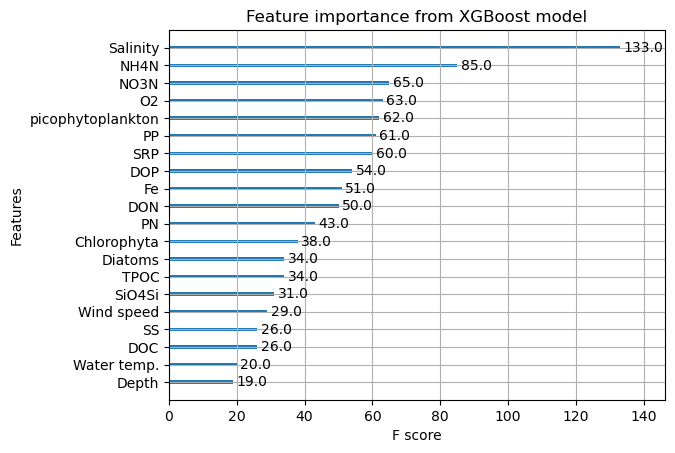

In [10]:
plt.figure()
plot_importance(model,title="Feature importance from XGBoost model")
plt.show()

In [11]:
# load JS visualization code to notebook
shap.initjs()

In [12]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X)

In [13]:
num_iterations = 5

# List to store Shapley values
shap_values_sum = np.zeros(X.shape)

In [14]:
for iteration in range(num_iterations):
    
    # Define and train the XGBoost model
    model = XGBRegressor()
    model.fit(X,y)

    # Create a Tree explainer
    explainer = shap.TreeExplainer(model)

    # Calculate Shapley values
    shap_values = explainer.shap_values(X)
    
    # Ensure the indices are within bounds
    valid_indices = np.arange(X.shape[0])
    shap_values_sum[valid_indices] = shap_values

In [15]:
average_shap_values = shap_values_sum / num_iterations

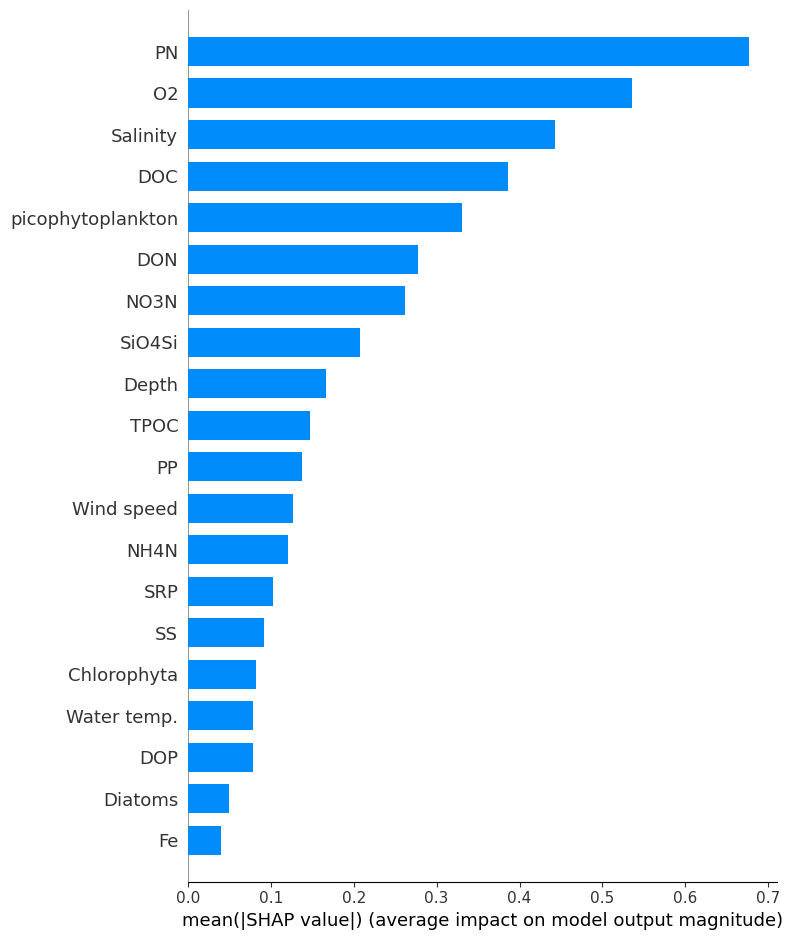

In [16]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)

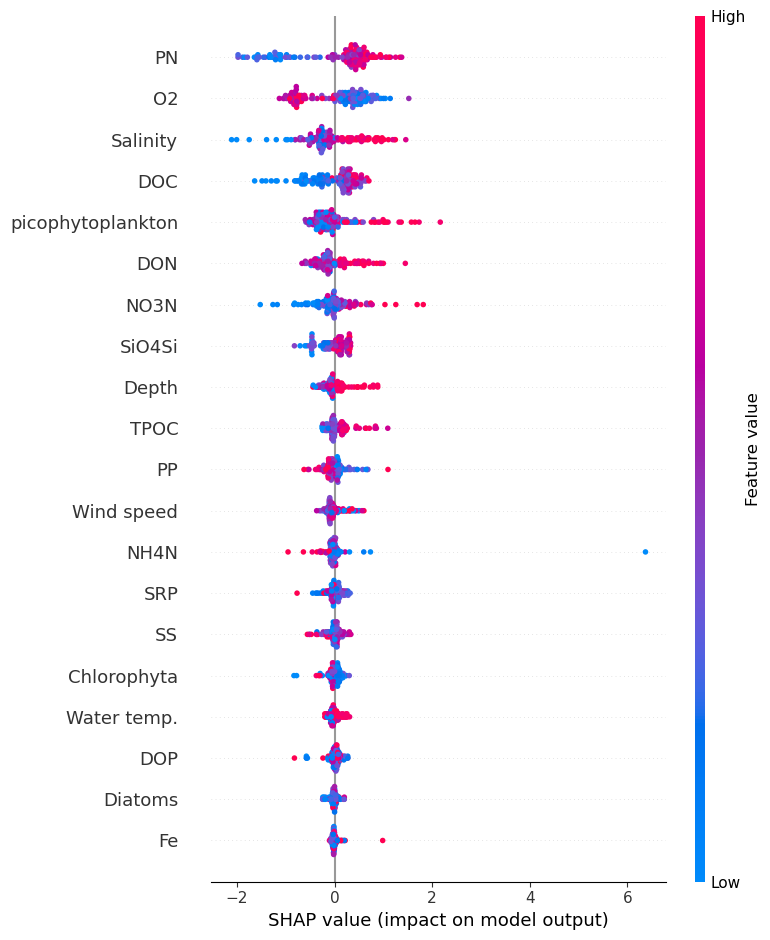

In [17]:
shap.summary_plot(shap_values, X,max_display=20)

In [18]:
# load JS visualization code to notebook
shap.initjs()

In [19]:
shap.force_plot(explainer.expected_value,  shap_values[:155,:], show=False, features=X.iloc[:155,:]) 

In [20]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

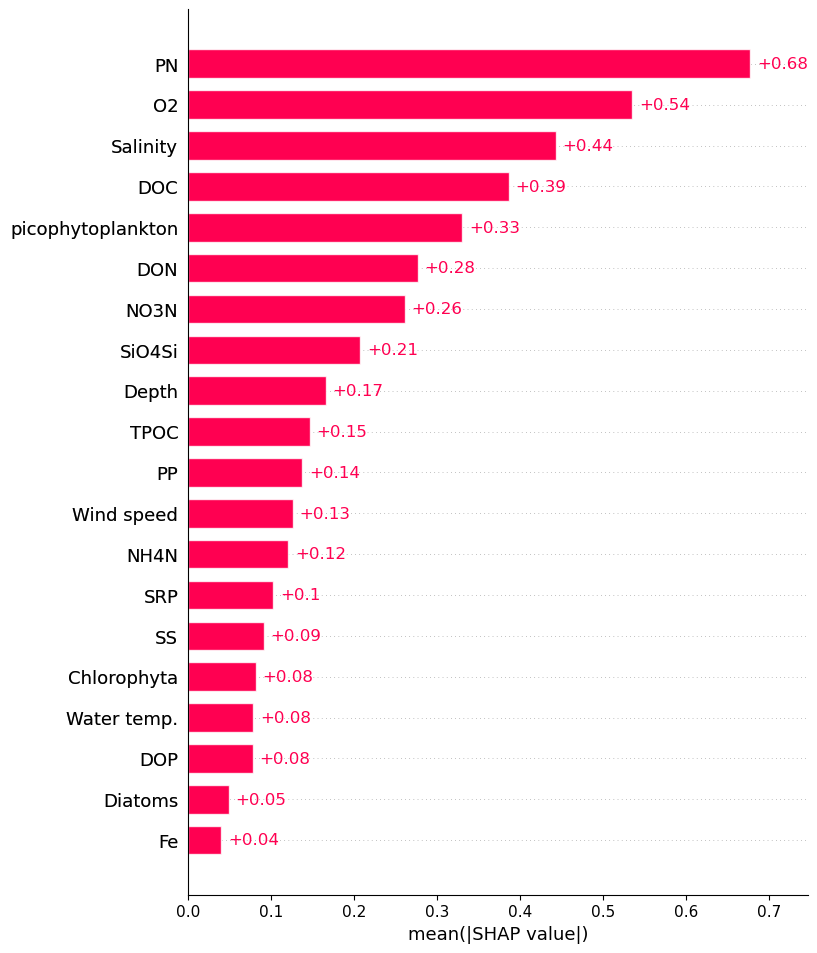

In [21]:
shap.plots.bar(shap_values, max_display=20)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/admin/Desktop/Machine Learning journal/VLagun_SHAP_2_cyano.csv') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
X = pd.get_dummies(data)
X.drop(['Cyanobacteria'], inplace=True, axis=1)
y = data['Cyanobacteria']
X

,Salinity,O2,SRP,DOP,PP,NH4N,NO3N,DON,PN,Fe,SiO4Si,DOC,TPOC,Chlorophyta,Diatoms,picophytoplankton,Water temp.,Wind speed,Depth,SS
0,3.757624,9.46,3.5,11.7,185.0,0.039,0.022,0.551,0.759,0.0121,2.3112,7.5000,8.5650,3.08,0.230,3.20,18.3,3.5,3.3,52.00
1,3.504707,9.89,4.4,17.5,111.3,0.020,0.025,0.123,1.181,0.0136,2.1157,7.8600,8.5200,2.87,0.010,2.42,19.1,0.0,3.6,50.00
2,3.721493,9.63,11.7,13.0,117.6,0.036,0.021,0.727,0.134,0.0390,2.1817,7.5350,8.4706,7.47,0.060,2.61,17.5,4.0,3.2,62.00
3,4.407982,9.54,7.4,16.2,124.7,0.023,0.024,0.566,0.895,0.0179,2.0537,7.2820,8.7020,5.03,0.110,2.49,18.4,3.5,3.0,55.00
4,4.389916,9.34,13.8,21.4,84.4,0.031,0.030,0.022,1.069,0.0201,2.0666,7.3700,7.8796,5.69,0.005,1.73,17.8,4.0,3.7,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,4.300000,9.79,18.1,5.2,150.0,0.048,0.018,0.519,1.037,0.0360,2.8380,7.4100,12.2980,1.76,0.490,3.51,16.4,6.7,3.2,113.75
151,3.900000,9.80,26.1,4.6,143.4,0.037,0.029,0.706,0.933,0.0910,2.9350,8.0990,10.3220,0.62,1.650,3.36,16.4,7.6,2.6,112.50
152,3.300000,9.82,21.7,36.8,125.0,0.035,0.026,0.877,0.971,0.0650,3.1920,8.6190,12.0510,2.49,1.670,3.41,16.1,8.2,2.4,93.75
153,3.100000,10.58,50.2,19.2,136.1,0.032,0.029,0.835,0.982,0.0120,3.2560,8.2215,10.8750,3.54,5.180,6.01,16.1,11.0,1.8,103.75


In [23]:
# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


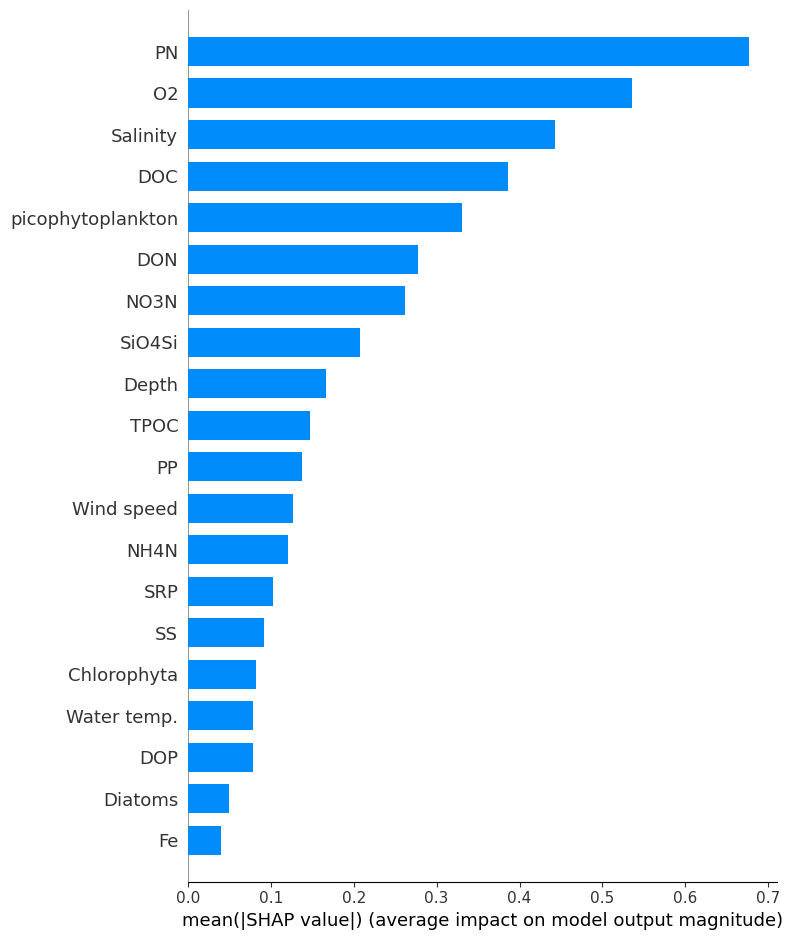

In [24]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)

In [25]:
def ABS_SHAP(df_shap, df):
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index', axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = []
    for i in feature_list:
        b = np.corrcoef(shap_v[i], df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.DataFrame({'Variable': feature_list, 'Corr': corr_list})
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,7),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


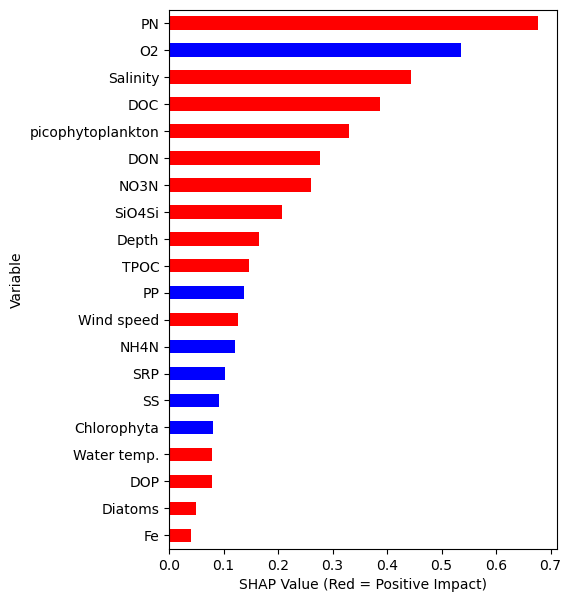

In [26]:
ABS_SHAP(shap_values, X) 
explainer = shap.Explainer(model)
shap_values = explainer(X)

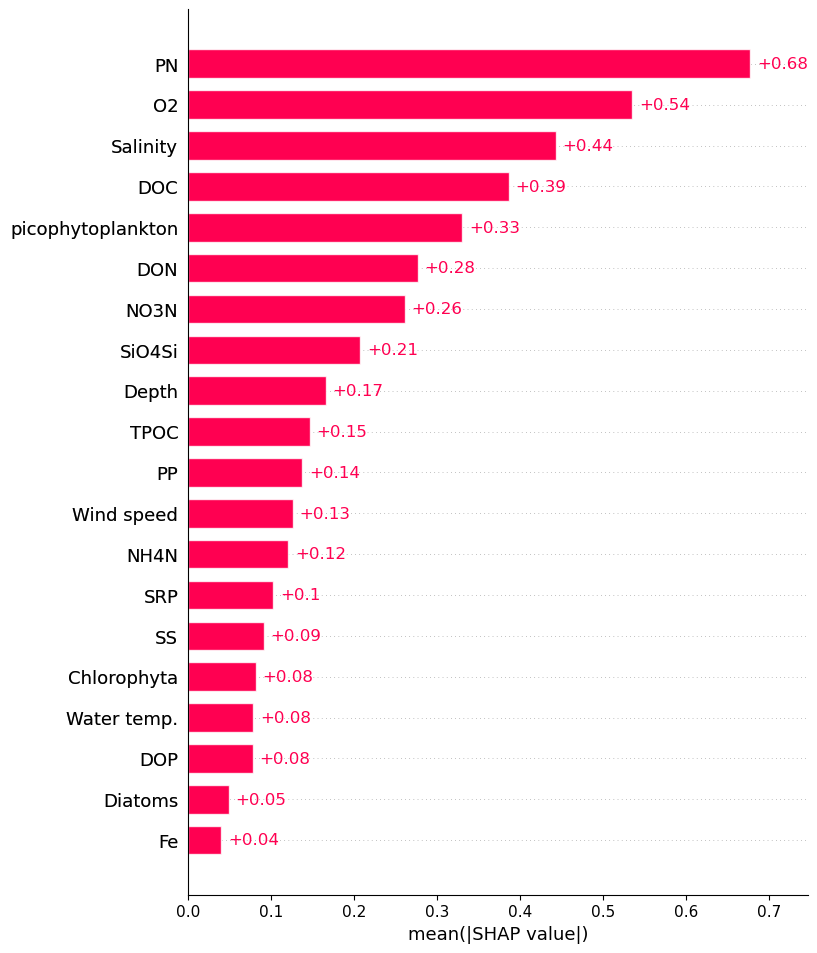

In [27]:
shap.plots.bar(shap_values, max_display=20)

In [28]:
import pandas as pd
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

print(shap_values) 

.values =
array([[ 3.12246233e-01,  4.33412433e-01, -3.84887964e-01,
        -2.13043541e-02, -3.50821577e-02, -1.69200808e-01,
        -1.41150445e-01, -2.05171585e-01,  3.18661839e-01,
        -2.61628535e-02, -4.24406350e-01, -3.10621709e-01,
        -1.02070104e-02, -9.14088190e-02, -7.24638999e-02,
        -3.76513034e-01,  1.94246334e-03, -1.09506294e-01,
        -6.91712126e-02, -5.10567486e-01],
       [-1.05193391e-01,  1.19462185e-01, -6.05747923e-02,
         7.16143250e-02,  4.49682623e-01, -4.30128947e-02,
        -3.15991998e-01, -5.44441584e-03,  6.97609186e-01,
         1.44190900e-02, -1.87775433e-01,  5.30300081e-01,
         6.47954352e-04,  7.60071874e-02, -2.37985719e-02,
         1.97000995e-01,  2.26798013e-01,  3.86460543e-01,
         1.14867859e-01,  4.40626498e-03],
       [-2.17550591e-01,  5.57845473e-01,  1.12148106e-01,
         4.47491892e-02, -4.22121845e-02, -1.40263019e-02,
        -3.59910667e-01,  7.49934763e-02, -1.32776225e+00,
        -8.26220214

In [29]:
import pandas as pd
import numpy as np

# Example shap_values (replace with your actual shap_values)
# shap_values should be a 2D array
shap_values = np.random.rand(155, 20)  # Replace with actual shap_values

shap_values = [[ 3.12246233e-01,  4.33412433e-01, -3.84887964e-01,
        -2.13043541e-02, -3.50821577e-02, -1.69200808e-01,
        -1.41150445e-01, -2.05171585e-01,  3.18661839e-01,
        -2.61628535e-02, -4.24406350e-01, -3.10621709e-01,
        -1.02070104e-02, -9.14088190e-02, -7.24638999e-02,
        -3.76513034e-01,  1.94246334e-03, -1.09506294e-01,
        -6.91712126e-02, -5.10567486e-01],
       [-1.05193391e-01,  1.19462185e-01, -6.05747923e-02,
         7.16143250e-02,  4.49682623e-01, -4.30128947e-02,
        -3.15991998e-01, -5.44441584e-03,  6.97609186e-01,
         1.44190900e-02, -1.87775433e-01,  5.30300081e-01,
         6.47954352e-04,  7.60071874e-02, -2.37985719e-02,
         1.97000995e-01,  2.26798013e-01,  3.86460543e-01,
         1.14867859e-01,  4.40626498e-03],
       [-2.17550591e-01,  5.57845473e-01,  1.12148106e-01,
         4.47491892e-02, -4.22121845e-02, -1.40263019e-02,
        -3.59910667e-01,  7.49934763e-02, -1.32776225e+00,
        -8.26220214e-02, -1.13295190e-01, -4.38835435e-02,
        -1.81889847e-01, -7.80484453e-02, -8.29203948e-02,
        -1.56007275e-01, -9.79872718e-02, -1.03860259e-01,
        -8.26244950e-02,  2.89331516e-03],
       [ 1.10321033e+00,  5.37299097e-01, -1.00045070e-01,
         6.39356747e-02, -7.50339851e-02, -8.26315284e-02,
        -1.28680646e-01, -1.40458137e-01,  5.91155946e-01,
         1.55716047e-01, -8.02518427e-02, -2.86075234e-01,
         8.20442736e-02, -1.20740756e-02,  1.84087623e-02,
         3.67212832e-01,  8.25427994e-02, -6.21493869e-02,
        -6.92193508e-02,  9.20585915e-02],
       [ 7.05397069e-01,  2.64129579e-01,  1.23431139e-01,
         4.91855107e-02,  1.11103587e-01, -8.08387622e-02,
        -3.21550250e-01, -1.93829015e-01,  4.51173425e-01,
        -4.32453491e-02, -1.03576787e-01, -8.17131460e-01,
         8.24650284e-03, -1.14986509e-01, -2.41656318e-01,
        -5.88551350e-02, -1.10981919e-01, -8.28191638e-02,
         9.32586417e-02, -1.08718999e-01],
       [ 3.18299800e-01,  4.64163810e-01, -1.71403334e-01,
         3.26608233e-02, -8.39856938e-02, -2.43568897e-01,
        -3.65216695e-02, -3.75660866e-01,  1.54871464e-01,
        -2.48703267e-02, -2.21225932e-01, -1.48772001e+00,
        -3.26212607e-02,  6.44991845e-02, -2.19768375e-01,
        -3.22679102e-01, -6.16941117e-02, -9.85126644e-02,
         1.16209395e-01, -1.42498314e-01],
       [-4.72509801e-01,  3.78632307e-01,  1.01997077e-01,
        -1.86123643e-02,  2.39114054e-02, -5.10460138e-02,
        -1.49513096e-01, -3.14352453e-01,  2.88631231e-01,
        -3.37418541e-02, -2.24502489e-01, -2.59063184e-01,
        -5.40570393e-02, -7.59047940e-02, -9.84175950e-02,
        -3.70510608e-01, -1.54518321e-01, -8.41354728e-02,
        -5.02761304e-02, -3.62017661e-01],
       [-1.27073050e-01,  3.60235184e-01, -2.36041248e-02,
        -1.28368720e-01,  1.41240776e-01, -3.10865846e-02,
        -1.28728345e-01, -9.70260501e-02,  5.05687296e-01,
         6.61497470e-03, -4.52469498e-01,  2.84943283e-01,
        -3.90411774e-03, -3.39575037e-02,  4.66121323e-02,
        -3.40296686e-01, -1.16465822e-01, -5.76500073e-02,
        -3.38345617e-02, -1.40150543e-02],
       [ 2.84702986e-01,  1.61621049e-01, -3.64032656e-01,
         5.94638437e-02, -5.97715639e-02, -3.59978586e-01,
         1.65892035e-01, -3.61068815e-01,  5.14778435e-01,
        -2.27288790e-02, -5.14229059e-01,  1.57564849e-01,
        -8.47789794e-02, -8.80763829e-02, -3.44378911e-02,
        -5.05042553e-01, -7.51399696e-02, -9.10733938e-02,
        -6.13276102e-02, -3.53838615e-02],
       [ 1.19160914e+00,  6.86986804e-01,  1.62967011e-01,
        -8.98070931e-02, -5.53451516e-02, -2.99197249e-02,
         7.83416182e-02, -1.97944731e-01,  4.82661068e-01,
         5.40704094e-02,  2.52639771e-01,  5.39732993e-01,
         6.30279109e-02,  2.34360799e-01,  9.13753137e-02,
         3.95100534e-01,  1.96494199e-02, -6.95542768e-02,
         1.49043471e-01,  4.84932698e-02],
       [ 9.59503055e-01,  1.52149475e+00,  1.01194270e-01,
         2.13219896e-01, -1.03158213e-01,  6.37311172e+00,
         4.46667045e-01, -9.30415839e-02,  8.60539973e-01,
         4.13108654e-02,  2.39405826e-01,  6.60776615e-01,
         3.84835876e-04, -3.93216172e-03,  7.18590692e-02,
         3.19249928e-01, -4.30258438e-02, -3.40864174e-02,
         4.61231828e-01, -3.53910178e-02],
       [-1.72099292e-01,  4.10559088e-01,  6.56313375e-02,
        -1.35157302e-01, -1.11368775e-01, -7.12762587e-03,
         4.73753549e-03,  2.41658747e-01,  3.80251557e-01,
        -1.05268404e-01,  2.06346363e-02, -2.41055131e-01,
        -8.25886279e-02, -4.20144163e-02, -2.70434655e-02,
        -4.67957973e-01, -1.74048692e-01, -8.69596004e-02,
        -2.91407883e-01, -1.10170454e-01],
       [-4.44161117e-01,  2.20297769e-01,  1.79527607e-02,
        -8.50211456e-02, -2.06715897e-01, -7.20819235e-02,
         2.26756811e-01, -3.94158155e-01,  4.34244365e-01,
        -5.75391911e-02, -6.01526424e-02,  2.48332396e-01,
        -6.91245869e-02, -2.15048734e-02, -5.02489656e-02,
        -3.65074068e-01, -1.71996772e-01, -2.41939440e-01,
        -3.41013759e-01, -7.92581365e-02],
       [ 8.06789339e-01,  6.02009356e-01,  2.86455542e-01,
         1.89493328e-01,  9.79091451e-02,  4.67129759e-02,
         4.25592422e-01, -3.20238620e-01,  5.86809278e-01,
         4.04486880e-02,  2.43451551e-01,  3.85140419e-01,
         6.79927878e-03, -4.85587539e-03, -1.44321041e-03,
        -1.42982215e-01,  4.05417867e-02, -7.97929019e-02,
         4.82231557e-01,  7.64239803e-02],
       [-1.52510390e-01,  6.31210089e-01,  3.81131992e-02,
         1.95203230e-01,  6.67106882e-02, -3.33034247e-02,
         6.53255582e-01,  4.98379707e-01,  5.31969249e-01,
        -4.40855548e-02,  2.57421225e-01,  3.04406822e-01,
        -3.99171188e-02, -6.16465956e-02,  2.79867847e-04,
        -2.89078075e-02,  3.57208662e-02, -9.87941474e-02,
         6.11492872e-01, -1.64581481e-02],
       [ 5.56152523e-01,  5.06005228e-01,  9.29602832e-02,
        -3.57574932e-02, -7.01847151e-02, -2.45959926e-02,
         1.57381460e-01,  7.02318728e-01,  4.32358801e-01,
        -3.33966799e-02,  2.97891110e-01,  3.48386437e-01,
         1.75559118e-01, -3.04930890e-03,  2.89236084e-02,
         7.21111298e-02, -2.67905835e-02, -4.83564660e-02,
        -1.80660039e-01,  4.07841615e-02],
       [ 5.93063384e-02,  5.19689500e-01,  8.14110935e-02,
         1.52525539e-02,  2.91448329e-02, -4.47519077e-03,
        -1.79242622e-02, -1.71867758e-01, -1.11051869e+00,
        -2.41013858e-02,  9.94180888e-02,  3.14177752e-01,
         7.13274419e-01, -1.25055145e-02,  1.62355714e-02,
         1.05953467e+00, -4.35138419e-02, -2.19218537e-01,
        -1.14036195e-01, -2.31924847e-01],
       [-2.31586993e-02,  6.09947324e-01,  8.39459673e-02,
         4.69258614e-02, -4.60076667e-02, -1.23627186e-02,
         2.90423334e-02,  2.70721853e-01,  3.93804908e-01,
        -3.69129442e-02,  2.72361577e-01, -5.29838316e-02,
         1.73311368e-01,  2.96415687e-02, -2.61206720e-02,
         9.94132996e-01,  9.88056436e-02, -3.12661946e-01,
        -2.04841927e-01,  2.10022584e-01],
       [ 9.02983725e-01,  8.60870063e-01,  3.29976045e-02,
        -7.27342442e-02,  7.34377429e-02, -3.74470018e-02,
        -5.43176830e-01,  6.15830660e-01, -5.61212957e-01,
        -1.78800486e-02,  2.29306649e-02,  2.80651212e-01,
         6.30214632e-01,  1.73402771e-01, -2.46147439e-01,
        -5.09754457e-02,  8.00471306e-02, -4.86332923e-02,
         2.88705170e-01, -2.59299334e-02],
       [ 9.50325012e-01,  9.49437857e-01,  3.71892229e-02,
         1.95752438e-02, -2.75117718e-02, -4.40116227e-02,
        -3.20920050e-01,  6.02011561e-01,  2.90368944e-01,
        -7.53429458e-02,  2.34983474e-01,  5.49192667e-01,
         7.02990666e-02,  9.41006839e-02,  1.12569578e-01,
         1.67791858e-01, -1.69696243e-04, -7.01950788e-02,
         4.00946349e-01,  2.65324656e-02],
       [ 5.05450070e-01,  3.08246017e-01, -2.30824172e-01,
         8.82736146e-02,  4.02639538e-01, -9.48483273e-02,
        -5.93299270e-01, -8.06260407e-02,  6.85355425e-01,
        -2.18741130e-02,  2.03670382e-01,  4.25060868e-01,
         2.25669555e-02,  2.11391486e-02, -2.39604488e-01,
         3.26580733e-01,  1.50828749e-01, -7.37410262e-02,
         1.42258093e-01,  4.06029411e-02],
       [ 3.53545576e-01, -6.11535847e-01,  8.69813263e-02,
         2.73110628e-01,  6.69062376e-01,  7.30807856e-02,
         3.93316776e-01, -1.89666182e-01,  1.37568915e+00,
        -8.20637308e-03, -2.88212776e-01,  4.71344680e-01,
        -1.20614216e-01, -6.92310780e-02,  2.08810437e-02,
         2.72117376e-01,  3.50359157e-02,  3.18185091e-01,
         4.70356822e-01,  2.37333868e-03],
       [ 4.57605064e-01,  5.36953211e-01, -4.48829561e-01,
         3.82215008e-02, -1.08396120e-01, -3.12964804e-02,
        -2.17785418e-01, -3.16902757e-01,  3.60332966e-01,
        -5.67026399e-02, -5.68069518e-01,  1.68163493e-01,
        -7.31885657e-02,  1.28864092e-04, -1.30020501e-02,
        -2.39811882e-01,  6.68663532e-02, -1.17469512e-01,
         1.19568475e-01,  5.17903492e-02],
       [ 8.85511577e-01,  4.40211058e-01,  1.88516915e-01,
        -7.99832270e-02, -7.27202883e-03, -8.04703161e-02,
         8.00525676e-03, -1.92653477e-01,  5.48592865e-01,
        -3.46357236e-03, -4.38626081e-01,  1.98881298e-01,
        -5.63363582e-02, -2.27917656e-02,  3.56760509e-02,
        -1.80337012e-01,  1.09755270e-01, -3.54350209e-02,
         9.76444110e-02,  1.10982686e-01],
       [-8.08398202e-02, -4.24426720e-02,  2.87656225e-02,
         8.72207433e-02,  1.94239825e-01,  5.94334491e-02,
         2.20979705e-01, -4.81628589e-02,  9.37964320e-01,
        -1.28697567e-02, -4.56946582e-01,  3.03655624e-01,
         2.13197663e-01, -1.58388466e-02, -9.05729458e-03,
        -1.61326472e-02,  2.64372081e-01,  3.56465816e-01,
        -2.26332575e-01,  3.98975872e-02],
       [ 2.71142364e-01, -5.88217676e-01, -4.45865132e-02,
         9.33861732e-02, -5.46924412e-01, -8.85631591e-02,
        -2.29572102e-01, -1.78185165e-01,  5.03354609e-01,
        -4.53633964e-02, -4.69020694e-01,  2.09264606e-01,
         1.03113361e-01, -2.77945604e-02, -2.32498944e-02,
        -1.42228901e-01,  6.76466851e-03,  4.44930717e-02,
         1.04180180e-01, -3.31666842e-02],
       [-5.87113760e-02, -8.99675488e-01, -1.47497524e-02,
         7.93647841e-02, -2.91762114e-01, -6.58587068e-02,
        -7.71083683e-02,  1.04953445e-01,  4.02919918e-01,
        -2.94985529e-02, -4.63431358e-01,  3.83849025e-01,
         2.60741651e-01, -2.69958060e-02, -1.94705948e-02,
         4.70534861e-01, -1.96814239e-02, -1.69474497e-01,
        -8.68456289e-02, -6.25318959e-02],
       [-2.00741142e-02, -9.22097802e-01,  2.64159776e-02,
         6.23868443e-02, -6.26985133e-01, -6.87718764e-02,
         3.32517289e-02,  1.50436193e-01,  3.62242937e-01,
        -1.87542592e-03, -4.68608379e-01,  2.09722117e-01,
         2.38987818e-01,  5.69210164e-02, -3.56648043e-02,
         5.01013361e-02, -1.99150145e-01,  8.69943276e-02,
        -3.89512599e-01, -3.66344601e-02],
       [-1.28419340e-01, -7.14328706e-01, -2.60652211e-02,
         8.60172287e-02, -2.48844832e-01, -4.35492359e-02,
        -3.91268656e-02, -8.14969167e-02,  5.93509376e-01,
        -3.22002135e-02, -4.69898254e-01,  3.97287667e-01,
         2.14085996e-01,  6.09841272e-02, -4.24206257e-02,
         5.47978938e-01, -1.83295291e-02, -2.20293999e-01,
        -6.83172941e-02, -3.83578315e-02],
       [ 1.24591911e+00,  6.51071012e-01,  1.90255836e-01,
        -1.29753903e-01, -5.05163558e-02, -5.63530698e-02,
         1.39422283e-01, -1.58860907e-01,  5.93897164e-01,
        -2.73906626e-02,  2.66725481e-01,  4.19262260e-01,
         3.95494215e-02,  1.17445908e-01,  7.97584355e-02,
         4.18989062e-01,  5.97846396e-02, -8.73389617e-02,
         3.40757482e-02,  1.27825309e-02],
       [ 1.22498643e+00,  9.18695927e-01,  2.50010461e-01,
         2.17985302e-01, -1.29352003e-01,  2.16243923e-01,
         7.00955868e-01,  1.44989467e+00,  1.06336379e+00,
         2.00166658e-01,  2.95077443e-01,  6.48766220e-01,
         1.93858415e-01,  3.01132172e-01,  8.55566561e-02,
         5.86083829e-01, -1.01625146e-02, -3.11019961e-02,
         7.92209983e-01,  2.17404943e-02],
       [ 6.20056629e-01, -1.10209107e-01,  3.19146603e-01,
        -6.14921264e-02, -3.90005767e-01, -9.73055810e-02,
        -3.51510756e-02, -2.18060598e-01,  5.34344494e-01,
        -4.32987586e-02, -1.45782351e-01, -4.18402880e-01,
        -2.67055109e-02, -5.86179039e-03,  1.94198653e-01,
        -1.32322073e-01, -1.67896394e-02, -1.30003750e-01,
        -5.90751395e-02,  4.99140583e-02],
       [ 1.01262581e+00,  5.39054275e-01,  2.72720754e-01,
         7.30572361e-03,  4.25947122e-02, -6.85490519e-02,
         9.64319259e-02, -9.50780958e-02,  4.84826744e-01,
         5.33063337e-03,  3.19243878e-01,  5.06239414e-01,
        -5.09384423e-02,  1.24236748e-01,  9.16845910e-03,
        -3.88038754e-02, -1.17114531e-02, -4.86587994e-02,
        -3.41465808e-02,  4.55403477e-02],
       [ 3.64138097e-01,  3.65431786e-01,  3.21424007e-02,
        -5.99997900e-02, -5.00102341e-02, -3.48804370e-02,
         1.74518246e-02,  1.04626849e-01,  6.68080509e-01,
        -3.45164984e-02,  2.85427302e-01,  2.94862777e-01,
        -6.22102097e-02, -6.48801401e-02,  3.24380305e-03,
         2.55483657e-01, -2.55624074e-02, -1.38572201e-01,
        -9.44858938e-02, -1.47931129e-01],
       [ 8.58737379e-02,  4.09696758e-01, -3.40137333e-01,
        -3.26028536e-03, -1.29803225e-01, -2.97554582e-01,
        -1.52376369e-01, -4.14582640e-01,  4.01005596e-01,
        -7.63801113e-02,  2.16570362e-01,  2.44703889e-01,
        -8.65941942e-02, -1.36318594e-01, -8.58549550e-02,
        -4.43490475e-01, -7.68118724e-02, -5.39952032e-02,
         5.61279505e-02,  8.27151611e-02],
       [ 1.36011243e-01,  1.53732598e-01, -7.69592643e-01,
         1.13279462e-01, -4.18191478e-02, -8.51812027e-03,
         2.51982510e-01, -2.14545019e-02,  5.21428943e-01,
        -6.50116205e-02,  2.98688203e-01, -2.23492920e-01,
         8.62563252e-02, -3.75465304e-01, -5.19706905e-02,
        -2.42226779e-01, -2.31252797e-02, -2.98754368e-02,
         1.47766814e-01,  4.10880446e-02],
       [ 3.06383789e-01,  1.87230498e-01,  1.81301516e-02,
        -5.78607738e-01, -1.40265182e-01, -3.25025767e-02,
         3.82241383e-02,  9.15835872e-02,  4.02972281e-01,
        -6.04822002e-02,  2.92794675e-01,  2.81008244e-01,
         1.56092405e-01, -3.22894633e-01, -4.67890762e-02,
        -2.86807656e-01, -1.75443816e-03, -1.35701731e-01,
         6.63596345e-03, -8.73006359e-02],
       [ 1.59870923e-01,  3.84197533e-01,  3.50748561e-03,
         4.07033227e-02, -1.38466030e-01, -8.48034211e-03,
         4.08676773e-01,  1.56762779e-01,  4.37212527e-01,
        -2.07083970e-02,  2.99770832e-01, -1.30825773e-01,
         1.43837973e-01, -3.74444649e-02,  7.05412123e-04,
        -3.86268087e-02,  6.67489469e-02, -1.36313453e-01,
        -2.26054698e-01, -3.74928787e-02],
       [-2.83151358e-01, -6.48536444e-01, -4.15739268e-02,
        -4.51072603e-02,  5.54866940e-02, -2.17589252e-02,
        -1.89773053e-01, -1.15778461e-01, -9.83463109e-01,
        -2.08039843e-02,  7.72308707e-02, -7.05134749e-01,
        -1.68300807e-01,  9.57373306e-02, -4.91023995e-02,
        -2.62437344e-01, -8.25830624e-02, -9.53599662e-02,
         5.24273589e-02, -2.97570676e-02],
       [-2.98904181e-01, -7.51325548e-01,  5.39209321e-02,
        -2.75977403e-02,  7.22925067e-02,  2.09684111e-02,
        -8.00580680e-02, -1.33798093e-01, -1.10773826e+00,
         6.22323761e-03,  1.09489076e-01, -6.64830267e-01,
        -1.11662649e-01,  6.05953373e-02, -6.40519932e-02,
        -1.79748490e-01, -7.33129904e-02, -9.81596857e-02,
         4.80352864e-02, -2.26603150e-02],
       [-2.71026820e-01, -7.31066108e-01,  1.70034599e-02,
         3.07970215e-03,  7.72809237e-02, -5.54877594e-02,
        -9.95364692e-03, -1.53847009e-01, -1.21845388e+00,
        -1.11392699e-02,  8.99891779e-02, -6.57488883e-01,
        -1.70938224e-01,  6.43064231e-02, -6.72928542e-02,
        -1.86260849e-01, -6.92812428e-02, -9.65253636e-02,
        -3.16380300e-02, -2.37894226e-02],
       [-2.40688130e-01, -6.78114653e-01, -2.26154272e-02,
        -2.13385113e-02,  5.90271950e-02, -3.85649614e-02,
        -7.34010190e-02, -1.04504652e-01, -1.22325230e+00,
        -1.57637261e-02,  8.84782672e-02, -6.78280830e-01,
        -1.81654602e-01,  4.76608574e-02, -1.06159687e-01,
        -1.79796100e-01, -6.76826760e-02, -1.07734755e-01,
        -2.12391671e-02, -2.68925820e-02],
       [-2.81314522e-01, -7.74588883e-01, -3.56805325e-02,
         1.24263987e-02,  5.63017838e-02, -9.20752138e-02,
        -3.36291105e-01, -9.61635932e-02, -1.14574564e+00,
        -4.64112423e-02, -2.09412593e-02, -6.00234866e-01,
        -2.55348533e-01,  8.37972835e-02, -5.45750111e-02,
        -2.22160950e-01, -8.54778886e-02, -1.09409027e-01,
         5.89568205e-02, -1.76240671e-02],
       [-2.72296280e-01, -6.08489156e-01, -3.71442363e-02,
         3.19878012e-02,  6.83532059e-02, -2.02794820e-02,
        -1.35666192e-01, -9.88191664e-02, -1.45788789e+00,
         1.27350325e-02,  1.28137633e-01, -2.65161037e-01,
        -1.70254946e-01,  5.66874444e-02, -1.97866112e-02,
        -2.26719692e-01, -6.12424389e-02, -9.89269912e-02,
         7.61234388e-02,  5.33705531e-03],
       [-3.06122273e-01, -7.95045912e-01, -2.37107519e-02,
         4.15300392e-02,  7.92203769e-02, -8.30005854e-03,
        -2.55981330e-02, -1.55928269e-01, -1.19777822e+00,
        -1.02727795e-02,  8.03825855e-02, -6.71006024e-01,
        -1.73926339e-01,  8.45484510e-02, -4.69795652e-02,
        -1.75088674e-01, -6.94894120e-02, -8.67809877e-02,
         6.33283257e-02, -2.45903805e-02],
       [-3.17770302e-01, -8.32816362e-01,  5.58034517e-02,
        -5.23165874e-02,  7.20192268e-02, -9.03823823e-02,
        -7.11069629e-03, -1.91655815e-01, -1.57352567e+00,
        -8.94632656e-03,  6.41067103e-02, -3.42571288e-01,
        -2.46757776e-01,  7.03102797e-02, -6.37018234e-02,
        -2.01894820e-01, -8.14991593e-02, -1.18996277e-01,
         6.50721192e-02, -1.94434449e-02],
       [-2.52103150e-01, -7.15484917e-01, -2.05425527e-02,
         1.52484328e-02,  5.88241927e-02, -3.22752371e-02,
        -2.20156088e-02, -1.34702623e-01, -1.58146238e+00,
        -2.31871493e-02,  8.77881795e-02, -2.60295212e-01,
        -2.42116570e-01, -1.21203894e-02, -1.15088947e-01,
        -1.51654452e-01, -7.52354190e-02, -1.23034619e-01,
        -4.67025414e-02, -6.36866828e-03],
       [-5.06448984e-01,  1.84712529e-01,  1.00709394e-01,
         5.76596782e-02, -6.27942085e-02, -6.39130592e-01,
        -1.41792968e-01, -3.47379953e-01,  2.28058204e-01,
        -5.34781404e-02, -1.38452798e-01, -3.82232517e-01,
        -3.19693834e-02, -1.22801147e-01, -2.00961828e-01,
        -4.21531379e-01, -2.82579493e-02, -1.11608431e-01,
        -1.15849152e-01,  3.17443237e-02],
       [-3.08447033e-01, -9.01396513e-01,  7.71543160e-02,
        -7.74412528e-02,  1.15318127e-01, -4.54869084e-02,
        -2.27128878e-01, -2.30466768e-01,  2.00427562e-01,
        -2.23052874e-02, -1.81707844e-01, -6.45752788e-01,
        -5.75767159e-02,  5.88237047e-02, -1.86764851e-01,
        -3.33920598e-01, -1.43093646e-01, -1.30427122e-01,
         1.22244358e-01,  4.59451191e-02],
       [-2.09535569e-01, -8.81299853e-01, -1.07651673e-01,
         3.78245786e-02,  6.47599846e-02, -9.25319362e-03,
         1.31564826e-01, -1.39410079e-01,  3.01334145e-03,
        -5.47066517e-03, -1.66178644e-01, -1.17681074e+00,
        -5.03003970e-02,  6.81969374e-02,  3.31755877e-02,
        -1.05219074e-01, -9.63264480e-02, -8.05659294e-02,
        -1.00831963e-01, -1.12105794e-01],
       [-5.58024347e-01,  8.48435685e-02,  9.31191817e-02,
         4.34541628e-02, -9.31037357e-04, -9.10638552e-03,
         9.02579445e-03, -5.77548563e-01, -8.13516200e-01,
         1.49647012e-01, -1.26025826e-01, -4.86969799e-01,
        -1.48561731e-01,  6.49297461e-02, -3.14835310e-02,
        -1.59593895e-01, -3.94246764e-02, -1.00972913e-01,
         1.28491074e-01, -1.95132226e-01],
       [-3.15468907e-01, -7.75927544e-01,  6.25074133e-02,
         3.48020047e-02,  9.55079570e-02, -7.28895841e-03,
        -2.07191613e-02, -1.74744710e-01, -1.30772579e+00,
        -3.84944794e-03, -9.14529860e-02, -6.09711170e-01,
        -1.51958793e-01, -1.47864381e-02, -3.05099972e-02,
        -7.80849606e-02, -8.03839117e-02, -9.60500687e-02,
         1.13711037e-01,  6.00999892e-02],
       [-2.83539265e-01, -9.64302778e-01, -1.21934675e-02,
         6.18082881e-02,  7.86595047e-02, -4.38691638e-02,
        -1.62921175e-01, -9.49369818e-02, -4.40986827e-02,
         1.32790674e-02, -1.10621393e-01, -1.20166004e+00,
        -5.57770990e-02, -3.75464112e-02, -4.72188294e-02,
         4.63121943e-02, -1.60247684e-01, -1.08118244e-01,
         7.85706043e-02, -1.73529968e-01],
       [-2.88456231e-01, -1.03500092e+00, -6.66383356e-02,
         6.03832304e-02,  1.01151675e-01, -9.54218030e-01,
        -8.66983309e-02, -2.21730128e-01,  1.42928539e-02,
        -9.17171314e-03, -1.16884276e-01, -6.11538351e-01,
        -6.22807182e-02, -5.39337136e-02, -9.32417065e-02,
        -1.09346712e-03, -1.25813335e-01, -4.28483188e-02,
         1.50611937e-01,  5.09317517e-02],
       [-2.66641527e-01, -7.85424232e-01,  6.43629488e-03,
         5.51671349e-02,  5.55949435e-02, -2.82127887e-01,
         1.93778630e-02, -2.19669119e-01, -1.34720504e+00,
        -5.06792171e-03,  8.95785540e-02, -2.39698902e-01,
        -1.58045039e-01,  4.69627902e-02,  2.65870988e-03,
        -8.67005736e-02, -5.42354025e-02, -3.43759209e-02,
         1.39944673e-01,  4.09878865e-02],
       [-3.22212875e-01, -7.99966455e-01,  6.97470903e-02,
         3.55945751e-02,  9.57717560e-03, -2.45564505e-01,
         1.43621080e-02, -1.69704750e-01, -1.21011829e+00,
         1.30207807e-01,  9.98398587e-02, -3.20879102e-01,
        -1.39231637e-01,  7.53211305e-02, -4.02301401e-02,
        -4.85545844e-02, -3.43772843e-02, -1.02136411e-01,
        -6.47861883e-02,  3.08244377e-02],
       [-5.18502057e-01,  6.75930036e-03, -6.63239509e-02,
         2.28903745e-03,  2.29233410e-04,  5.27475588e-02,
        -4.07502711e-01, -3.73328596e-01, -8.40371847e-01,
        -2.55133752e-02, -8.77656415e-02, -5.46132207e-01,
        -2.22770765e-01, -9.87340733e-02, -4.28036042e-02,
        -3.15756619e-01, -5.29002994e-02, -1.58054814e-01,
         8.43418688e-02,  6.74746633e-02],
       [-7.19203234e-01,  1.77636817e-02,  9.01983008e-02,
         3.25826257e-02, -3.76281701e-02,  3.52032408e-02,
        -4.41145778e-01, -4.25007641e-01, -1.25635064e+00,
        -2.71424074e-02, -2.24483684e-02, -5.71929395e-01,
        -1.66431397e-01, -1.33940607e-01,  1.99310649e-02,
        -2.24787459e-01, -5.35899736e-02, -1.03663743e-01,
         6.84238151e-02,  3.75193655e-02],
       [-1.39400697e+00,  3.72515410e-01,  6.85724840e-02,
         2.01237183e-02, -5.71352653e-02,  5.09008914e-02,
        -1.47291243e-01, -2.15584263e-01, -4.22323912e-01,
        -6.12569274e-03,  1.57738894e-01,  9.77302939e-02,
         5.07375181e-01,  8.77037272e-02,  4.52393740e-02,
        -2.77067870e-01, -5.12452200e-02, -5.95820211e-02,
        -5.10744117e-02, -8.93728249e-03],
       [-5.04281402e-01, -1.88907266e-01, -8.18179175e-02,
         5.27286008e-02, -8.50619078e-02, -5.13435788e-02,
        -4.41313744e-01, -3.41897935e-01,  2.50211656e-01,
         3.06715239e-02,  7.68419579e-02, -7.47813344e-01,
         1.47038162e-01, -8.52754787e-02,  6.46330938e-02,
        -3.68072361e-01, -5.15478775e-02, -9.79476422e-02,
         1.50043190e-01, -5.58567464e-01],
       [-4.19523090e-01, -4.44542676e-01, -1.41494602e-01,
        -2.60079801e-02, -4.99573983e-02, -6.20532297e-02,
        -1.46980956e-01, -2.40771800e-01,  2.36501515e-01,
        -2.01219432e-02,  1.23211771e-01, -1.29708624e+00,
         1.56740874e-01, -3.82082947e-02,  4.87713628e-02,
        -2.03199506e-01, -5.91935962e-02, -1.77835763e-01,
        -4.81058136e-02, -3.59624207e-01],
       [-6.30584598e-01,  3.07117760e-01, -1.34016182e-02,
         9.60382819e-03,  2.16074027e-02, -4.15720679e-02,
        -1.37756735e-01, -4.05261308e-01, -1.09799302e+00,
         1.56686306e-02,  1.44393966e-02, -7.63132751e-01,
         4.37750936e-01, -1.10999472e-01, -1.02750976e-02,
        -1.29803985e-01, -7.04776347e-02, -8.58339146e-02,
         1.04650259e-01, -5.55867441e-02],
       [-6.81754708e-01,  5.56436814e-02, -3.60978320e-02,
         2.84086522e-02, -8.15137625e-02, -3.81232351e-02,
        -9.49347168e-02, -2.12707296e-01, -7.02321887e-01,
        -5.23384772e-02,  1.63760453e-01, -7.98011363e-01,
         4.43666339e-01,  4.07526344e-02,  1.06798403e-03,
        -2.64024615e-01, -5.68913333e-02, -7.10982531e-02,
        -4.37779352e-02, -1.51458025e-01],
       [-3.63270670e-01, -2.61679649e-01, -9.51319933e-02,
         1.46668358e-02,  4.46783602e-02, -1.82948723e-01,
         7.25451857e-02, -4.07298684e-01,  3.20191830e-01,
         4.64934669e-02,  1.27389893e-01, -5.99962771e-01,
         1.58410043e-01,  3.47692799e-03,  1.84848189e-01,
        -5.97135127e-02, -4.17476632e-02,  3.83177027e-02,
        -4.48484980e-02, -4.77488041e-01],
       [-1.19518280e+00,  1.61840066e-01, -3.02878898e-02,
        -6.52232161e-03,  1.22667113e-02, -6.92882985e-02,
        -1.68521315e-01, -1.91939741e-01, -5.48716843e-01,
        -2.10382659e-02,  1.17776774e-01,  1.92710578e-01,
         6.45559609e-01, -2.74370294e-02,  3.48776858e-03,
        -9.70881358e-02, -6.55209571e-02,  2.79039256e-02,
        -3.99190970e-02, -9.22251344e-02],
       [-4.93878692e-01,  1.81050941e-01, -7.39239082e-02,
        -5.77056050e-01, -2.17632070e-01,  6.37962576e-03,
        -2.57450379e-02, -6.08187497e-01,  4.30799007e-01,
        -4.06656154e-02, -6.28631935e-02,  1.67670101e-01,
        -6.38651010e-03, -8.33424032e-01, -3.26418579e-02,
        -5.14024079e-01, -3.02760806e-02, -1.15680173e-01,
         1.04346476e-01, -3.93163264e-02],
       [-8.05443347e-01,  6.42819345e-01,  7.92805701e-02,
         6.93053901e-02, -4.74017225e-02,  6.62652031e-02,
         2.10491523e-01, -5.98658562e-01, -1.97908616e+00,
        -1.95798408e-02,  2.54670233e-02,  1.97470367e-01,
        -1.31211996e-01,  2.23670118e-02, -6.02290817e-02,
        -3.72359097e-01,  1.62643637e-03, -9.24548358e-02,
         2.16293097e-01,  3.30340005e-02],
       [-2.64011204e-01,  5.18111706e-01,  2.24990658e-02,
         5.24179079e-02,  6.50171414e-02,  6.81306347e-02,
        -1.75330900e-02, -1.64558649e-01,  6.16835654e-01,
        -2.64062453e-02,  1.05837733e-01, -1.67552993e-01,
        -2.39547435e-02, -2.39599496e-02,  7.74362981e-02,
         1.32150817e+00, -1.92721471e-01, -1.63672522e-01,
        -3.19320053e-01,  2.54037738e-01],
       [-1.15253858e-01,  1.00121558e+00,  1.33398563e-01,
         2.66602993e-01,  2.34576240e-01,  3.17040868e-02,
         1.69227314e+00, -2.52597511e-01,  8.11091781e-01,
         3.35517968e-03,  3.06390166e-01,  4.07853454e-01,
        -4.38358774e-03,  1.57275781e-01,  6.21782849e-03,
         2.16644073e+00, -8.47118720e-03,  5.63020587e-01,
         5.53191185e-01,  2.39189528e-02],
       [ 1.68252707e-01,  1.14078057e+00,  1.98229998e-01,
         2.02700436e-01,  1.09469497e+00,  3.50190885e-02,
         7.70870149e-01,  6.98785365e-01,  8.31056178e-01,
        -1.39085227e-03,  1.54787555e-01,  3.82181406e-01,
        -4.28003666e-04,  2.40593955e-01,  5.03292121e-02,
         1.73260045e+00, -2.28599031e-02,  4.33928043e-01,
         7.96970606e-01,  1.89493343e-01],
       [-1.36967599e-01,  2.30251014e-01, -6.56427518e-02,
         5.14189079e-02, -1.12365589e-01,  3.88930477e-02,
        -4.95767705e-02, -2.30325609e-01,  5.12966573e-01,
        -1.43260825e-02, -4.37538564e-01,  1.26842141e-01,
        -2.55375765e-02,  6.08984083e-02,  6.14289120e-02,
        -5.62035918e-01, -1.83775753e-01,  9.73580126e-03,
        -3.14450502e-01,  9.69483927e-02],
       [-1.95597813e-01,  3.23066443e-01, -7.75350332e-02,
        -5.56603968e-01, -3.59544069e-01, -4.05437090e-02,
         2.40659848e-01, -3.74024749e-01,  4.78701591e-01,
        -5.11590466e-02, -9.60600749e-02,  1.54666469e-01,
        -4.30335067e-02, -2.97137588e-01, -3.09707858e-02,
        -3.43471318e-01,  1.60602152e-01,  2.21574735e-02,
        -4.26067077e-02, -1.23669244e-01],
       [-2.37541124e-01,  2.20865786e-01, -6.40494972e-02,
        -2.38657132e-01, -3.18619460e-01, -1.04818614e-02,
         3.22196960e-01, -3.45583290e-01,  3.44338059e-01,
        -3.28433961e-02, -8.23338568e-01,  4.68211770e-02,
         1.07018441e-01, -5.43746278e-02, -8.44371133e-03,
        -6.00617051e-01,  2.34306186e-01,  5.03543625e-03,
        -2.37893432e-01, -3.40192318e-01],
       [-4.95684952e-01,  2.89419860e-01,  3.86700891e-02,
         2.49212491e-04,  1.20716810e-01, -3.02256271e-02,
        -1.17437005e+00, -2.09938973e-01,  5.37555158e-01,
        -2.35689692e-02, -1.46840081e-01,  2.43809640e-01,
        -2.15647202e-02, -6.96991906e-02, -3.25235468e-03,
        -2.27984369e-01,  7.24024400e-02, -1.03960492e-01,
         1.46870568e-01,  5.52487895e-02],
       [-7.07122743e-01,  2.58192390e-01,  8.03474113e-02,
         2.07130145e-02, -8.70661736e-02, -3.56463902e-02,
        -1.52376342e+00, -4.85871285e-01,  2.27738276e-01,
        -2.47011632e-02,  2.92572174e-02,  1.55445620e-01,
        -6.73354268e-02, -9.80222076e-02,  1.11317504e-02,
        -3.85759205e-01,  3.83723266e-02,  1.04452753e-02,
        -4.43528444e-01,  2.49820352e-02],
       [-2.16952950e-01,  5.26903391e-01,  1.07957453e-01,
         2.22829469e-02,  1.12171061e-01, -3.23662646e-02,
        -2.33442523e-02, -5.62560186e-02,  4.21302319e-01,
        -7.69215287e-04,  4.17693444e-02,  1.58441365e-01,
        -4.71785031e-02,  1.46197036e-01,  2.84701549e-02,
        -8.12900660e-04,  5.04647046e-02,  3.59068781e-01,
        -8.92079696e-02,  1.59308940e-01],
       [-1.56555772e-01,  7.56671369e-01,  7.82792866e-02,
         4.32922170e-02, -1.36244902e-02, -4.36361954e-02,
        -1.16389491e-01, -9.57410857e-02,  4.28358406e-01,
        -2.25288533e-02,  1.35285050e-01, -2.98480898e-01,
        -3.05473860e-02,  6.91201389e-02, -2.41604950e-02,
         1.02550352e+00, -3.74795459e-02, -1.81238234e-01,
        -1.01510674e-01, -1.66179091e-01],
       [ 5.50685525e-01,  1.92196697e-01, -2.33157232e-01,
         5.64569086e-02, -3.79347205e-02,  1.14020571e-01,
        -1.95371732e-01, -2.82342613e-01,  6.28024459e-01,
         2.55888104e-02,  1.09184854e-01, -2.19695881e-01,
         4.69728699e-03,  1.13200352e-01,  3.68570946e-02,
        -2.36253664e-01,  7.75052607e-03, -7.26927146e-02,
         1.40619516e-01,  1.75089702e-01],
       [-3.15404117e-01,  6.42268479e-01,  6.46483600e-02,
         4.41213399e-02, -8.70395228e-02, -1.26575567e-02,
         5.72187155e-02, -2.88921028e-01,  3.12701106e-01,
        -6.78028865e-03,  1.76004231e-01, -2.50248492e-01,
         9.76506621e-02,  1.10259585e-01, -1.58471148e-03,
        -2.63659418e-01,  2.51306444e-02,  3.11099917e-01,
        -6.79483041e-02,  1.90863878e-01],
       [-7.49867931e-02,  4.53507990e-01, -5.14583709e-03,
         2.24827714e-02, -1.01409547e-01, -4.44754735e-02,
        -2.49256864e-02, -2.36637458e-01,  3.50134015e-01,
        -6.72008144e-03,  1.31499007e-01, -1.97937340e-01,
         1.58191830e-01,  4.88365032e-02,  2.27397308e-02,
        -3.75165313e-01, -1.49207273e-02,  3.04515272e-01,
        -9.73449647e-02,  1.55962035e-01],
       [-1.00091912e-01,  5.69950521e-01, -3.06949634e-02,
         4.83418368e-02, -1.22998275e-01, -3.91861387e-02,
         2.46536538e-01,  4.66375679e-01,  6.76867723e-01,
         1.46290353e-02,  3.02473545e-01,  2.76205689e-01,
        -3.58517803e-02,  1.15475766e-01, -3.37125675e-04,
        -1.61600299e-02,  1.62314682e-03,  5.93754835e-02,
        -1.98592663e-01,  5.34337386e-02],
       [-1.99885875e-01,  4.97846931e-01,  5.03127985e-02,
        -3.29779051e-02, -2.04565600e-01, -3.39203775e-02,
        -2.87080202e-02, -2.52575159e-01,  6.34735465e-01,
        -1.62391402e-02,  2.98203647e-01,  2.78456450e-01,
        -1.95441712e-02,  6.20369874e-02, -2.89964839e-03,
         8.14468443e-01,  8.10438171e-02, -3.67814153e-01,
        -1.11851647e-01, -2.68405706e-01],
       [ 6.92263961e-01,  4.24597025e-01,  1.45507753e-01,
        -7.03838021e-02, -8.40336010e-02, -2.72892028e-01,
        -8.18644941e-01, -4.82323080e-01,  2.50889629e-01,
        -4.28019874e-02,  4.64299135e-02,  1.24386035e-01,
         1.06188931e-01, -1.11859210e-01, -4.53617349e-02,
        -3.79715770e-01, -8.94663557e-02, -5.41613670e-04,
         6.15467727e-02,  9.43001136e-02],
       [ 8.36050272e-01,  7.84897089e-01,  1.78866252e-01,
         4.02098224e-02,  6.52147969e-03, -2.93725252e-01,
        -2.51211852e-01, -1.48579150e-01,  6.14953756e-01,
         2.12015267e-02,  6.56762123e-02,  1.01458229e-01,
        -5.91586567e-02,  1.77021086e-01, -4.79978364e-04,
         7.28504509e-02, -2.66892780e-02,  7.93590248e-02,
         1.58740982e-01,  1.29607797e-01],
       [ 3.84741239e-02,  6.06737018e-01,  2.52894878e-01,
         5.63843586e-02, -3.76310460e-02, -3.26284557e-03,
         2.73590922e-01,  5.66894829e-01,  3.42005849e-01,
        -8.65897723e-03,  1.37815252e-01, -1.55186757e-01,
         2.27814987e-01,  6.97393715e-02,  7.37705380e-02,
         1.36564946e+00,  6.16695471e-02,  2.08846182e-01,
        -3.73467863e-01,  3.33747357e-01],
       [ 8.45768929e-01,  8.17112565e-01,  1.69635534e-01,
         1.18968748e-02, -1.63662042e-02, -7.78895393e-02,
        -5.95747679e-02, -2.11517736e-02,  3.51296604e-01,
        -1.32743213e-02,  1.13214314e-01, -9.95835841e-01,
         1.42859668e-01,  9.66358781e-02,  7.57916737e-03,
        -5.32931313e-02, -3.02322619e-02,  4.33162190e-02,
        -5.54859303e-02,  1.51556373e-01],
       [ 9.41290379e-01,  3.76885951e-01,  1.50897354e-01,
        -3.89492256e-03,  2.36925147e-02, -8.62796381e-02,
        -6.75551668e-02,  1.07854083e-02, -3.82296234e-01,
        -2.19850522e-02,  6.24162853e-02, -4.38601613e-01,
         8.28072906e-01,  9.18381810e-02,  1.10775745e-03,
         9.58096934e-04, -5.02159521e-02,  1.41547903e-01,
        -3.84996869e-02,  6.74396381e-02],
       [ 4.32579309e-01,  6.49501681e-01, -1.97056219e-01,
         3.09928153e-02, -1.32479876e-01, -1.24405019e-01,
        -2.86319572e-02, -5.03652573e-01,  2.27118000e-01,
        -2.82091275e-02,  1.11897541e-02, -6.59537852e-01,
         1.06055014e-01, -2.50731945e-01, -2.28451528e-02,
         4.41106223e-02, -3.18286344e-02,  1.07602753e-01,
         1.07976295e-01,  1.29881710e-01],
       [ 5.83414257e-01,  4.88655716e-02,  1.58997551e-01,
         7.77630485e-04,  3.06850355e-02, -8.54761228e-02,
         1.15166046e-02, -1.34623155e-01, -2.98468024e-01,
        -1.69004835e-02,  4.31184545e-02, -4.52307463e-01,
         8.38377953e-01, -6.87550753e-02, -1.01395687e-02,
         2.23980509e-02, -4.05997448e-02,  1.14072122e-01,
        -9.75933075e-02,  5.01282439e-02],
       [ 1.43151164e-01,  1.71521038e-01,  2.73882389e-01,
        -7.59554282e-03, -1.43265545e-01, -5.06007373e-02,
        -2.16468304e-01,  1.15293674e-01,  2.66835958e-01,
         8.62207264e-02,  1.14939503e-01, -4.10351604e-01,
         2.03334883e-01,  6.83526546e-02,  1.99569285e-01,
         8.91750574e-01, -1.36935012e-02,  2.49564514e-01,
        -1.12451196e-01,  3.07646126e-01],
       [ 1.45974290e+00,  8.44697297e-01, -1.32831395e-01,
         6.52354881e-02,  3.32232863e-01,  5.97773731e-01,
        -1.50523320e-01,  1.81583047e-01,  9.70735073e-01,
        -1.40116988e-02,  1.92400560e-01,  5.30539989e-01,
         5.25274724e-02,  1.82582214e-01,  1.20318472e-01,
         7.99826682e-01, -2.02217717e-02,  3.30945522e-01,
         1.89270794e-01,  2.44471077e-02],
       [-1.06295556e-01,  3.25834602e-01, -1.25255406e-01,
         3.63645293e-02,  1.57000348e-01, -4.94045839e-02,
        -3.42984200e-01,  4.79143411e-01,  4.70711708e-01,
         3.42189670e-02, -4.17462647e-01,  2.98654914e-01,
        -1.26909735e-02,  6.50719777e-02, -1.17871866e-01,
        -4.45739925e-01,  2.53396451e-01,  3.04798812e-01,
        -1.10850103e-01, -2.79291868e-02],
       [-2.05702364e-01,  1.03004336e-01,  2.76521504e-01,
         1.18140146e-01,  4.68179524e-01,  5.42940618e-03,
         1.63101420e-01, -6.70319423e-02,  1.25114012e+00,
        -2.45966273e-03, -1.27911702e-01, -2.96611160e-01,
        -5.67527115e-02,  6.99861050e-02,  1.99311003e-01,
        -1.08661488e-01,  3.07861596e-01,  5.08359909e-01,
        -2.15275422e-01, -1.31622553e-02],
       [-1.79801926e-01,  3.99138272e-01, -3.62786315e-02,
         4.35014963e-02,  1.71707477e-02, -3.20286825e-02,
        -7.48612463e-01,  2.00588778e-01,  3.57928723e-01,
        -7.04247728e-02, -8.85914117e-02,  1.10716701e-01,
        -2.27812175e-02,  1.12389319e-01,  6.18090853e-03,
        -5.24011612e-01, -1.53695166e-01, -8.87770206e-02,
        -2.10336775e-01,  3.56067345e-02],
       [-2.47708976e-01, -2.52439175e-02,  4.26128730e-02,
         1.13677584e-01,  6.82542980e-01,  3.31705995e-02,
        -9.78445709e-02, -2.58042254e-02,  1.33823609e+00,
         1.36292698e-02, -1.83136776e-01,  5.71677685e-01,
         7.03351898e-03, -8.53560679e-03,  1.02508115e-02,
         1.63617402e-01,  2.36917451e-01,  4.80032802e-01,
        -4.86851037e-02,  6.16910607e-02],
       [-3.77003819e-01,  7.66908407e-01,  2.30638478e-02,
        -2.23674644e-02,  1.03358319e-02, -4.53286469e-02,
        -1.53956935e-01, -1.70018703e-01,  3.07642937e-01,
        -8.43752176e-03, -1.55887052e-01, -6.77339971e-01,
         7.84419477e-03, -6.78492561e-02, -3.29465680e-02,
        -4.69616577e-02, -1.34083271e-01, -1.23006046e-01,
         9.30915251e-02,  8.39028358e-02],
       [ 6.87914938e-02,  7.49514163e-01,  8.62977728e-02,
         2.44242638e-01,  2.77400285e-01,  8.17808807e-02,
         1.81788564e+00,  9.42161679e-01,  5.90600491e-01,
         9.86082077e-01,  2.90010482e-01,  3.17274928e-01,
        -2.57252865e-02,  7.53601044e-02,  4.19660006e-03,
        -1.35746479e-01,  5.72431274e-02,  1.84483558e-01,
         8.82413805e-01, -2.68843342e-02],
       [-5.47588527e-01,  5.96960962e-01,  4.72428054e-02,
         2.82875225e-02, -1.22996457e-01,  3.06567252e-01,
        -3.29785615e-01,  5.59877992e-01, -1.59264350e+00,
         3.89570817e-02, -1.89898401e-01,  1.32741839e-01,
        -1.44984663e-01,  5.85042406e-03,  4.07500118e-02,
        -5.99757172e-02,  1.69595107e-01, -4.93872426e-02,
        -1.45165086e-01,  2.32181437e-02],
       [-1.69671476e-01,  5.33140957e-01,  2.45461628e-01,
         1.26274815e-03, -6.08586594e-02,  7.35717356e-01,
         3.03826034e-01,  9.99994278e-01,  5.71326554e-01,
         4.01624106e-02,  2.53497303e-01,  2.92971134e-01,
        -2.24258914e-03,  2.63654552e-02, -3.44508253e-02,
        -2.99021415e-02,  1.67028949e-01, -1.68447159e-02,
        -1.88062757e-01,  3.86363268e-02],
       [-6.89337730e-01,  1.06989399e-01,  2.16840617e-02,
        -2.99120247e-02, -6.90696090e-02,  1.05088474e-02,
         1.81035712e-01, -3.83328050e-01,  6.03628516e-01,
        -4.64430563e-02,  3.28291625e-01,  1.55141711e-01,
        -4.62736525e-02, -6.92354515e-02, -6.28071353e-02,
        -1.48044661e-01,  9.93430987e-03,  6.32617176e-02,
        -4.78787422e-02,  4.96020615e-02],
       [-9.50987116e-02, -3.57029945e-01,  4.19677496e-02,
         4.36430387e-02,  2.94195831e-01, -1.85061350e-01,
         6.20354600e-02, -1.51217520e-01,  1.05111969e+00,
        -2.29666010e-02,  2.56362557e-01,  3.91782552e-01,
        -2.76353788e-02, -1.73625350e-02, -3.28573622e-02,
        -2.01527569e-02,  5.56038059e-02, -1.04016840e-01,
        -6.83093742e-02,  4.25320677e-02],
       [-4.92804319e-01,  5.76453030e-01,  1.50228173e-01,
        -5.78929037e-02, -1.07432924e-01,  5.71865663e-02,
         6.57784104e-01,  8.61571848e-01,  5.67793131e-01,
        -1.73089635e-02,  2.57225782e-01,  4.60794270e-01,
        -1.13697529e-01, -2.97656298e-01,  9.51207243e-03,
        -8.02057679e-04,  5.51862409e-03, -6.45054728e-02,
         6.02545023e-01, -2.64780279e-02],
       [ 6.65471375e-01,  7.92514563e-01,  5.27021550e-02,
         1.81347191e-01,  1.45287901e-01, -4.69774846e-03,
         7.52317667e-01,  9.25833941e-01,  4.45791930e-01,
         2.17424273e-01,  1.45666093e-01,  7.04028130e-01,
         1.82242587e-01,  1.27779290e-01,  1.02346629e-01,
         4.30859447e-01,  1.78671002e-01, -2.23080982e-02,
         7.29057074e-01, -4.58444422e-03],
       [-4.64845270e-01,  1.21298268e-01, -6.63593262e-02,
        -3.13811190e-02, -7.91083872e-02, -5.59087358e-02,
        -1.19856380e-01,  4.13493603e-01,  6.01470590e-01,
        -8.79793391e-02,  1.30275235e-01,  4.48966712e-01,
         1.50833517e-01,  4.59208060e-03,  6.57633832e-03,
        -2.32755646e-01,  7.57673010e-02, -5.15368320e-02,
        -2.00968817e-01, -4.79458366e-03],
       [-1.73821822e-01,  4.69585329e-01,  2.05049425e-01,
         8.28621984e-02, -1.82752773e-01, -2.34909337e-02,
         4.39100116e-01,  9.63737190e-01,  5.66909730e-01,
         3.01183611e-02,  3.02656740e-01,  4.08795357e-01,
         1.68068752e-01, -3.96296345e-02,  9.37846396e-03,
        -2.37340808e-01,  2.40106300e-01,  2.37137690e-01,
        -2.79119372e-01,  3.75683507e-04],
       [-1.28765643e-01,  5.85844696e-01,  9.32606906e-02,
         2.69658118e-01,  5.74969172e-01,  6.00919016e-02,
         1.25512838e+00,  7.97763467e-01,  6.30878389e-01,
        -1.88672300e-02, -1.81908146e-01,  6.22639477e-01,
         5.71577810e-02,  5.53237386e-02,  1.87206976e-02,
         2.24081486e-01,  3.94949839e-02,  4.22675014e-01,
         8.84533167e-01,  2.48610061e-02],
       [ 5.73828101e-01, -1.13266528e+00,  8.22073072e-02,
         3.12914141e-02, -1.49042020e-02,  4.39233799e-03,
         9.02044401e-02,  1.27010688e-01, -9.07260537e-01,
        -6.90708309e-02, -2.59127200e-01,  1.91003844e-01,
         1.09023106e+00, -4.19895761e-02,  1.54356677e-02,
         7.07275569e-02, -3.65103185e-02,  1.97084919e-01,
        -1.49186090e-01, -4.52777743e-03],
       [ 2.64834434e-01, -4.58919585e-01,  2.21336633e-02,
         1.12530157e-01,  6.44653380e-01,  9.49039869e-03,
         1.96291894e-01,  4.91633872e-03,  1.14557230e+00,
         2.65727881e-02, -2.01248616e-01,  4.52859938e-01,
         8.54685828e-02, -4.28163484e-02,  8.48763138e-02,
         2.45525241e-01,  2.50752538e-01,  8.53563026e-02,
        -2.18063757e-01,  1.69881303e-02],
       [-2.62276322e-01, -4.68855262e-01, -1.36765167e-02,
         3.50416750e-02, -2.17278868e-01, -3.28806019e-03,
        -7.21835997e-03, -1.93124205e-01, -1.00761771e+00,
        -1.47307422e-02, -2.03654692e-01,  1.59397244e-01,
         8.56972814e-01, -3.60047594e-02, -5.42968176e-02,
         2.39000674e-02,  1.44521460e-01,  1.70781150e-01,
        -4.09507714e-02, -5.50267214e-05],
       [-8.19943547e-02,  2.17140883e-01, -5.91693744e-02,
         6.31595924e-02, -8.30367133e-02, -2.90739089e-02,
        -3.62670004e-01,  1.93508759e-01,  1.88614517e-01,
        -7.27860928e-02, -4.63920981e-01,  1.44728810e-01,
         1.90815285e-01, -1.39729269e-02, -3.46058086e-02,
        -2.47101203e-01,  2.11302727e-01, -8.18724260e-02,
        -9.57366750e-02,  4.45353985e-02],
       [ 1.73126817e-01, -6.79229379e-01, -2.22363979e-01,
         1.02223098e-01, -2.64802247e-01, -1.31334197e-02,
         1.19895406e-01,  1.17519453e-01,  5.88197827e-01,
        -3.54852304e-02, -4.82372791e-01,  4.21248376e-01,
         2.02976808e-01, -2.03242507e-02, -2.91686505e-04,
         2.05579400e-01,  1.47931665e-01, -1.47443801e-01,
        -2.31222287e-01, -8.40764418e-02],
       [-9.23001766e-02, -6.26995325e-01, -3.73205431e-02,
        -8.22990417e-01, -2.22218946e-01,  5.96400350e-03,
         2.97817767e-01, -2.14140490e-01,  3.45419765e-01,
        -2.08104932e-04, -7.06718147e-01,  2.29987562e-01,
         2.45257497e-01,  4.06495109e-02, -6.50883326e-03,
        -1.05490297e-01,  2.05571607e-01, -2.81247348e-01,
        -2.54921377e-01, -9.35761607e-04],
       [-2.42940396e-01, -6.88727319e-01, -1.80375233e-01,
         1.58548877e-02, -5.26548564e-01, -4.85707000e-02,
        -1.17630437e-02, -1.08997069e-01,  3.35164160e-01,
        -3.13391425e-02, -6.06656432e-01,  2.76668668e-01,
         2.12739602e-01, -4.54502553e-02, -1.86600517e-02,
        -1.13015011e-01, -2.01615430e-02, -1.30038887e-01,
        -5.60847372e-02,  3.74859199e-02],
       [-1.94367751e-01, -1.69188008e-02, -8.94753709e-02,
         1.05301052e-01,  1.90250009e-01, -1.54738501e-01,
         2.12089881e-01, -1.73626542e-01,  1.11345494e+00,
        -2.32626125e-02, -4.93260145e-01,  3.65624517e-01,
        -5.95278479e-02,  6.90407604e-02,  6.56344229e-03,
        -1.59731239e-01,  2.82482523e-02, -1.19687065e-01,
        -6.89507276e-02,  1.35591879e-04],
       [ 5.05607665e-01, -2.53339946e-01,  3.54906134e-02,
         1.18775122e-01,  2.19580203e-01,  3.39581184e-02,
         3.22696641e-02,  4.73498739e-03,  7.85106003e-01,
        -7.20074167e-03, -4.63197559e-01,  2.74541736e-01,
         2.39602685e-01,  9.36513022e-02,  2.78169196e-03,
        -1.80974588e-01, -1.73199311e-01,  2.86574900e-01,
        -3.29649061e-01,  6.16669916e-02],
       [-2.85080373e-01,  2.65687615e-01,  4.73219194e-02,
        -2.60805842e-02,  3.10686111e-01, -6.10119663e-03,
         7.40504563e-01,  6.00850224e-01,  4.33103621e-01,
         4.54765446e-02,  3.08901966e-01,  5.49802482e-01,
         1.74670920e-01, -4.19127122e-02, -3.63683999e-02,
        -2.59537935e-01,  5.61876483e-02, -1.09964296e-01,
        -3.76990475e-02,  4.74392734e-02],
       [ 2.45051101e-01,  4.51429278e-01,  1.10487476e-01,
         9.08554718e-02, -1.55334100e-01, -1.93825737e-02,
         1.03258729e+00,  4.03480709e-01,  4.60524946e-01,
         1.91760510e-02,  3.10974568e-01,  4.24029887e-01,
         1.87438026e-01, -1.77853424e-02,  1.24016302e-02,
         1.09603786e+00,  7.17016384e-02,  5.36898673e-02,
        -2.73815751e-01,  2.23877072e-01],
       [ 9.74947751e-01,  3.67964625e-01,  2.10965902e-01,
         3.00880075e-02, -2.42540147e-02, -4.93963175e-02,
         4.38486822e-02, -1.47146836e-01,  3.75677586e-01,
        -3.94655950e-02,  3.13368529e-01,  4.97937620e-01,
         1.60960495e-01,  5.83299203e-04, -1.78519636e-02,
        -1.29121050e-01, -1.51163647e-02, -4.13406268e-02,
        -7.10367113e-02,  9.65641588e-02],
       [ 5.92988133e-01,  4.35444772e-01,  1.84252858e-01,
        -2.67290091e-03, -1.20964564e-01,  1.99895371e-02,
         5.36584258e-01,  4.37275738e-01,  5.62131584e-01,
         4.83384803e-02,  3.28393459e-01,  3.00243437e-01,
         1.93224460e-01,  6.80438951e-02, -1.97945051e-02,
        -3.25140536e-01,  6.38136044e-02, -3.14264409e-02,
        -2.92299926e-01, -1.20969743e-01],
       [ 3.93532217e-01,  3.80487055e-01, -2.49990448e-01,
        -2.08629072e-02, -1.36110947e-01, -1.18666952e-02,
         3.06838423e-01,  4.55132067e-01,  4.29263443e-01,
         4.38857712e-02,  3.02600056e-01,  2.94809878e-01,
         1.46680236e-01,  8.50903988e-02, -4.20372374e-02,
        -2.88567781e-01,  6.11132607e-02, -5.42376414e-02,
        -4.38818216e-01,  6.13001473e-02],
       [ 6.78529143e-01,  3.67959738e-01,  8.40261132e-02,
         1.82631910e-01, -2.87704051e-01, -5.46275564e-02,
         4.02959675e-01, -3.92151922e-01,  5.19537866e-01,
        -7.63754994e-02,  3.15104693e-01,  3.67309660e-01,
         1.46614447e-01, -5.37955724e-02,  1.08693726e-02,
        -3.97439897e-01, -1.06794871e-02, -9.89867076e-02,
         3.46292883e-01,  1.83382649e-02],
       [-2.65141964e-01, -8.04550469e-01, -1.34374592e-02,
        -7.41112395e-04,  4.38999869e-02, -4.38419990e-02,
        -1.41230509e-01, -1.08134747e-01, -4.11641262e-02,
        -1.46033717e-02,  1.06918491e-01, -1.63895535e+00,
        -3.93225960e-02,  4.90266159e-02, -2.19747961e-01,
        -2.87921876e-01, -1.49546117e-01, -3.32986861e-02,
         7.09256381e-02, -4.14178483e-02],
       [-9.97267067e-01, -8.53399575e-01, -5.36269908e-05,
        -5.58081530e-02,  3.44591029e-02, -2.66837869e-02,
        -1.35998562e-01, -8.86721313e-02, -1.31517678e-01,
        -1.38044748e-02,  9.81809273e-02, -6.28313601e-01,
        -4.45272662e-02,  5.19424118e-02, -1.86063245e-01,
        -3.57996136e-01, -1.39714822e-01, -3.44515219e-02,
        -2.50563323e-02,  1.21331820e-02],
       [-8.08954358e-01, -8.01295877e-01, -2.22283322e-02,
        -2.59759650e-02, -1.55513272e-01, -4.69589382e-02,
        -1.29417926e-01, -1.32337123e-01, -9.25325632e-01,
        -1.54523915e-02,  1.01983286e-01, -1.27845973e-01,
        -1.99921191e-01,  3.27944309e-02, -3.62208039e-02,
        -3.23660314e-01, -4.61603329e-02, -2.88716517e-02,
        -2.56578010e-02, -4.55607008e-03],
       [-2.61189938e-01, -7.19432652e-01, -2.55104396e-02,
        -3.64943892e-02,  5.91687746e-02, -7.74907246e-02,
        -9.65899676e-02, -8.99344683e-02, -1.54644358e+00,
        -2.68182289e-02,  1.52757401e-02, -2.74219304e-01,
        -2.55419403e-01,  3.80578078e-02, -4.83442247e-02,
        -2.95108199e-01, -7.51161054e-02, -4.27794047e-02,
        -1.93969738e-02, -2.29428783e-02],
       [-3.23740184e-01, -7.30028331e-01, -7.60429399e-03,
         5.53648407e-03, -8.87222216e-02, -4.03286889e-02,
        -7.44314343e-02, -1.09867096e-01, -1.97935188e+00,
        -3.63425016e-02,  1.54971078e-01,  2.11449817e-01,
        -2.07934782e-01,  5.66648692e-02, -4.76873154e-03,
        -1.34153530e-01, -5.04127145e-02, -9.63340774e-02,
        -4.74366061e-02, -9.28863138e-03],
       [-3.17539155e-01, -7.78822303e-01, -3.72964554e-02,
        -5.48169427e-02,  6.33876249e-02, -3.76859754e-02,
        -2.49129105e-02, -1.77885354e-01, -1.42086136e+00,
        -3.88393328e-02,  6.19205497e-02, -1.29309192e-01,
        -2.33148485e-01, -1.26926333e-01, -7.81745240e-02,
        -2.01510653e-01, -6.96706176e-02, -1.01965271e-01,
         5.43764010e-02, -2.24625636e-02],
       [-2.83596665e-01, -9.89240646e-01,  1.31947575e-02,
        -3.97034250e-02,  1.31977126e-01, -7.15110777e-03,
        -1.67553760e-02,  1.39786422e-01, -1.84155774e+00,
        -2.32111756e-02, -2.30027944e-01,  1.95035711e-01,
        -2.03537270e-01, -1.98135413e-02, -7.69756734e-05,
        -1.51681125e-01, -5.31257391e-02, -1.04681015e-01,
        -9.54148844e-02, -1.72568396e-01],
       [-2.11139607e+00, -8.36699665e-01,  6.84826002e-02,
         1.00727836e-02,  1.19977377e-01, -1.84597261e-02,
        -2.67741710e-01, -1.33568421e-01, -8.10631886e-02,
        -2.05186270e-02, -1.72529206e-01,  1.40744388e-01,
        -7.43159056e-02, -2.58111004e-02, -1.98831223e-02,
        -3.22425514e-01, -1.11546941e-01, -3.33572887e-02,
        -6.66249990e-02,  1.54593270e-02],
       [-9.65384781e-01, -8.38445008e-01,  2.72912271e-02,
         2.36318577e-02,  8.81928876e-02, -8.21342543e-02,
        -1.43953696e-01, -1.32606849e-01, -1.27238142e+00,
        -4.09370027e-02, -1.89892560e-01,  8.54415670e-02,
        -2.40337953e-01, -3.09086628e-02, -2.11690329e-02,
        -3.19895893e-01, -3.71124968e-02, -2.90731564e-02,
        -3.83112840e-02,  5.64379757e-03],
       [-2.54948229e-01, -6.36104286e-01, -4.39682975e-02,
         5.36838397e-02,  6.74015209e-02, -6.69031462e-04,
         3.05092540e-02, -1.21806912e-01, -1.64481759e+00,
        -2.51209289e-02, -1.26449928e-01, -1.45053074e-01,
        -1.57049820e-01, -3.86687927e-02,  8.00382625e-03,
        -4.35595438e-02, -2.74750944e-02, -9.69533175e-02,
        -8.74407291e-02,  2.85462718e-02],
       [-8.91085982e-01, -7.84938574e-01,  6.28664121e-02,
         3.52582559e-02,  6.81395832e-05, -1.33497929e-02,
        -6.40508831e-02, -1.42295033e-01, -1.12638903e+00,
        -1.40617564e-02, -2.44448438e-01,  5.24850860e-02,
        -1.84495926e-01, -3.28025557e-02, -2.25479738e-03,
        -1.17112808e-01, -4.23922464e-02, -8.15299451e-02,
        -7.40755573e-02,  1.26792574e-02],
       [-2.21405834e-01, -7.79421628e-01,  6.53184429e-02,
         7.70369247e-02,  7.06779435e-02,  2.17741132e-02,
         1.80366918e-01, -2.40304455e-01, -1.78824067e+00,
        -3.65999411e-04, -2.06231698e-01, -2.50563592e-01,
        -2.08341196e-01,  3.02818953e-03, -5.03730029e-02,
        -1.93848073e-01, -5.42600043e-02, -3.75097580e-02,
         1.43200576e-01, -1.51778162e-01],
       [-1.91556096e-01, -9.20684636e-01, -5.08314259e-02,
        -3.83321289e-03, -1.98597424e-02, -1.12131514e-01,
        -2.77222842e-01, -1.32540390e-01, -9.81781304e-01,
        -1.89721826e-02, -4.80084643e-02, -5.80903530e-01,
        -2.46203154e-01,  8.83601829e-02, -1.73833687e-02,
        -2.32952461e-01, -4.09759209e-02, -1.47731677e-01,
         4.84484471e-02,  1.47298267e-02],
       [-3.92975718e-01, -1.05158377e+00, -3.01628299e-02,
        -6.34501651e-02, -6.82010874e-02, -3.47706303e-02,
        -6.76519513e-01,  7.28826076e-02, -3.03846709e-02,
        -4.91254739e-02, -2.15080883e-02, -4.33716536e-01,
         9.61438864e-02, -3.34212445e-02, -7.00650588e-02,
        -3.57144326e-01, -4.22375090e-02, -1.30714536e-01,
        -5.23394980e-02, -5.22620738e-01],
       [-2.36719444e-01, -8.12530875e-01, -1.66071635e-02,
         9.06758681e-02, -2.22650006e-01, -8.76883976e-04,
        -8.35685432e-01,  1.03659511e-01,  3.02119255e-01,
         1.39927147e-02,  6.17785119e-02, -3.43548954e-01,
         2.27141574e-01, -2.01057177e-02, -1.14434129e-02,
        -2.86469340e-01, -7.91249648e-02, -9.05317292e-02,
        -8.27784762e-02, -3.74224335e-01],
       [-2.48648971e-01, -8.34053099e-01, -1.96904372e-02,
        -1.35768694e-03, -8.70356429e-03, -5.09169735e-02,
        -1.01429127e-01,  1.44310087e-01, -1.88583887e+00,
         1.87795743e-01,  1.46387756e-01,  1.78078368e-01,
        -1.50544956e-01, -3.93063426e-02, -1.58110131e-02,
        -1.09549193e-02, -4.84196991e-02, -8.71470869e-02,
        -4.52652536e-02,  4.97098640e-02],
       [-1.75013423e+00,  2.42694497e-01, -1.12412276e-03,
        -4.70563993e-02, -1.20578483e-01, -5.30771539e-02,
        -5.49152851e-01,  1.96893632e-01,  1.88194305e-01,
        -3.93789187e-02,  1.36992320e-01,  1.48972765e-01,
         1.36749744e-01,  1.33608207e-02, -1.91225708e-02,
        -3.17969680e-01, -8.07329118e-02, -4.51902524e-02,
        -1.53819039e-01, -6.85028806e-02],
       [-2.04047799e-01, -1.00568807e+00, -1.27119616e-01,
        -1.84353329e-02, -9.89352837e-02, -4.75928932e-02,
        -4.32316437e-02, -8.06677416e-02,  7.99996033e-02,
         1.63573083e-02,  9.90329161e-02, -1.40773487e+00,
        -4.81243394e-02, -4.92967516e-02,  6.90668672e-02,
         6.45407736e-02, -8.09560195e-02, -9.65073183e-02,
         5.75692058e-02,  5.76970801e-02],
       [-3.24394345e-01,  4.05562967e-01,  8.04192275e-02,
        -1.43056452e-01, -3.19488138e-01, -4.57972854e-01,
        -1.35971442e-01, -6.68938994e-01,  3.35629553e-01,
        -5.11530554e-03, -4.65596497e-01,  2.07523972e-01,
         2.30917037e-02, -2.29545925e-02, -3.43240947e-02,
        -2.97553480e-01,  1.10741751e-03, -9.55213532e-02,
         1.22083940e-01,  2.31569484e-02],
       [-5.22129655e-01,  5.64383090e-01, -2.21377369e-02,
         2.68387143e-02, -8.09119642e-02, -4.02013138e-02,
         1.30504742e-01, -4.74154264e-01, -1.61742091e+00,
        -4.14422229e-02,  5.60982106e-03,  1.77694514e-01,
        -1.35610893e-01, -3.88412103e-02, -4.08346169e-02,
        -3.70264292e-01, -4.67518941e-02, -1.10428952e-01,
        -1.27419338e-01, -2.81128660e-02],
       [-2.00768280e+00,  2.99162835e-01, -1.42460153e-03,
         6.91442415e-02, -1.07543662e-01,  7.80524388e-02,
         3.11094820e-01, -4.02250350e-01,  3.45219910e-01,
         1.70521308e-02,  1.88349187e-01,  1.96756154e-01,
        -1.40695218e-02, -8.55393894e-03, -3.89176868e-02,
        -2.82913625e-01, -2.01020539e-01, -6.78209364e-02,
        -3.45150620e-01, -9.80796944e-03],
       [-1.25111803e-01,  5.21010339e-01,  8.09742734e-02,
        -8.37342255e-03, -5.84519580e-02, -4.13286611e-02,
         6.86164573e-02, -2.29064316e-01,  5.06473839e-01,
        -1.98565964e-02,  2.55640060e-01,  2.77403831e-01,
        -3.08474097e-02, -7.22958101e-03,  3.44369896e-02,
         1.00801826e+00, -3.33162770e-02, -2.00979874e-01,
        -8.87958258e-02, -2.31580004e-01],
       [-2.78145760e-01,  4.17498976e-01, -2.06306037e-02,
         3.19968276e-02, -1.32225588e-01,  1.31378040e-01,
         4.26799119e-01, -1.95794731e-01,  7.77504802e-01,
        -1.01331975e-02,  2.54349113e-01,  3.29585463e-01,
        -1.79750193e-02,  9.47016999e-02, -3.41478065e-02,
         1.64857388e+00,  1.68511987e-01,  1.59666777e-01,
        -2.19177172e-01,  5.43252286e-03],
       [-2.39146069e-01,  4.90066379e-01, -1.61287233e-01,
        -5.75771987e-01, -1.19101539e-01,  7.34007061e-02,
         8.49168152e-02, -3.43528837e-01,  5.32096267e-01,
        -5.08102588e-03, -4.71378446e-01,  1.49780571e-01,
         3.87028493e-02, -7.96332140e-04,  6.23352118e-02,
         9.25186336e-01, -3.70892212e-02, -1.75030768e-01,
         1.78001970e-01, -1.68605849e-01],
       [-3.40043932e-01,  2.83747077e-01, -7.72863403e-02,
         1.58892421e-04, -1.42093405e-01, -4.82791066e-02,
        -1.26457465e+00,  2.10940868e-01,  4.54622209e-01,
         1.82468519e-02,  3.69826518e-02,  1.95842192e-01,
        -2.06050668e-02, -9.32292789e-02, -3.73378955e-02,
        -2.55211920e-01,  1.79479234e-02,  8.15211888e-03,
        -7.78433606e-02,  9.81354993e-03],
       [-4.74856287e-01,  4.88848329e-01, -2.19004631e-01,
         1.09483525e-02, -1.57846417e-02, -4.05004621e-02,
         1.32949844e-01,  5.95563412e-01,  6.61135733e-01,
         5.63538745e-02,  2.97727406e-01,  4.32443589e-01,
        -3.93023677e-02,  4.53357361e-02,  2.27127094e-02,
        -1.62987977e-01,  2.13899121e-01, -5.22968471e-02,
        -1.50750682e-01,  2.54701283e-02],
       [-2.55873357e-03,  1.04028690e+00,  9.74033475e-02,
        -6.78526179e-04, -2.19774563e-02, -2.54143067e-02,
         4.39485237e-02,  5.05670488e-01,  7.46147335e-01,
         4.75937594e-03,  2.75060982e-01,  3.17022771e-01,
        -1.26202535e-02, -4.71706083e-03,  9.17093605e-02,
         1.57375538e+00, -2.07008831e-02,  6.00975871e-01,
         6.98250253e-04,  2.89107949e-01],
       [-4.32224393e-01,  2.10943341e-01,  1.04030989e-01,
         4.03424278e-02, -6.82282448e-02, -4.99280617e-02,
        -8.62183888e-03, -3.76416743e-01,  5.32604396e-01,
        -8.58036987e-03,  2.02874407e-01, -5.21760106e-01,
        -2.85024550e-02,  8.51918608e-02,  4.16486664e-03,
        -5.86804450e-01, -6.10908214e-03, -7.14193135e-02,
        -9.83680263e-02,  6.46169260e-02],
       [-2.94760346e-01,  5.26536882e-01, -2.94223696e-01,
        -1.88925415e-02,  8.32582861e-02, -2.00498675e-04,
        -5.88040948e-01,  1.92522004e-01,  4.73299265e-01,
        -3.38034816e-02,  8.27155411e-02, -3.42623800e-01,
        -4.37302515e-02,  1.07361570e-01,  1.72800664e-02,
        -3.74564007e-02,  8.21449384e-02, -1.64152887e-02,
         1.74773052e-01,  1.08167499e-01],
       [ 8.49385142e-01,  7.49950647e-01,  2.15428174e-01,
        -5.14780618e-02,  5.31339608e-02, -7.78017268e-02,
        -3.65199685e-01, -5.92814125e-02,  3.16704154e-01,
        -6.33478770e-03,  7.35315233e-02,  7.11518452e-02,
         1.69920355e-01,  1.70718104e-01, -3.20204068e-03,
        -1.98573008e-01, -1.18407933e-02, -3.61228175e-02,
        -2.97802687e-02,  1.97187066e-01],
       [ 4.54152584e-01,  3.60032499e-01,  6.65073022e-02,
        -4.50699143e-02,  5.03607653e-02, -4.24379595e-02,
        -1.10814795e-01,  2.30035514e-01,  3.22309911e-01,
         1.24846950e-01,  8.60699937e-02,  1.16242401e-01,
         9.93975699e-02, -7.79238045e-01, -3.31109874e-02,
        -2.96960503e-01, -1.74431689e-02, -3.64775094e-03,
        -1.91838548e-01,  1.08652644e-01],
       [-3.28669876e-01,  7.61392154e-03, -6.38292804e-02,
        -3.18341590e-02, -6.52794987e-02, -4.78691235e-02,
        -4.12298560e-01,  3.27684909e-01,  4.96503264e-01,
        -1.72597207e-02,  3.04270267e-01,  2.32631907e-01,
         1.50142774e-01,  9.89550650e-02, -3.12791876e-02,
        -2.90669858e-01, -1.25026599e-01, -4.14793380e-03,
        -2.29249910e-01,  3.76050770e-02],
       [-1.13675527e-01, -8.90416265e-01, -1.76843315e-01,
         7.49831870e-02, -5.75074404e-02, -2.43860073e-02,
        -6.39693066e-02,  1.89330816e-01,  9.47477639e-01,
         1.99962684e-04,  2.81064332e-01,  4.36460406e-01,
         1.25108019e-01,  1.01917228e-02,  3.44532877e-02,
         7.52349436e-01, -2.71037482e-02,  2.44517431e-01,
        -5.89716248e-02,  1.63977012e-01],
       [-1.36377336e-02,  4.53444213e-01,  1.33387372e-01,
        -1.21799171e-01,  7.32009299e-03, -1.11318752e-02,
         9.25617591e-02,  1.71056136e-01,  4.33804750e-01,
         4.09997767e-03,  1.10774674e-01, -3.03549200e-01,
         1.59733370e-01,  1.10736802e-01,  2.71918979e-02,
         8.32066655e-01,  6.91680983e-02,  1.73406348e-01,
        -1.63828447e-01,  3.02886397e-01]]

# Define columns list
X = ['Salinity', 'O2', 'Water temp.', 'SS', 'SRP', 'DOP', 'PP', 'NH4N', 'NO3N', 'DON', 'PN', 'Fe', 'SiO4Si', 'TPOC', 'DOC', 'Chlorophyta', 'Diatoms', 'picophytoplankton', 'Wind speed', 'Depth']

shap_df = pd.DataFrame(shap_values, columns=X)

# Display the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(shap_df)

     Salinity        O2  Water temp.        SS       SRP       DOP        PP  \
0    0.312246  0.433412    -0.384888 -0.021304 -0.035082 -0.169201 -0.141150   
1   -0.105193  0.119462    -0.060575  0.071614  0.449683 -0.043013 -0.315992   
2   -0.217551  0.557845     0.112148  0.044749 -0.042212 -0.014026 -0.359911   
3    1.103210  0.537299    -0.100045  0.063936 -0.075034 -0.082632 -0.128681   
4    0.705397  0.264130     0.123431  0.049186  0.111104 -0.080839 -0.321550   
5    0.318300  0.464164    -0.171403  0.032661 -0.083986 -0.243569 -0.036522   
6   -0.472510  0.378632     0.101997 -0.018612  0.023911 -0.051046 -0.149513   
7   -0.127073  0.360235    -0.023604 -0.128369  0.141241 -0.031087 -0.128728   
8    0.284703  0.161621    -0.364033  0.059464 -0.059772 -0.359979  0.165892   
9    1.191609  0.686987     0.162967 -0.089807 -0.055345 -0.029920  0.078342   
10   0.959503  1.521495     0.101194  0.213220 -0.103158  6.373112  0.446667   
11  -0.172099  0.410559     0.065631 -0.

In [30]:
shap_df.to_excel('C:/Users/admin/Desktop/Machine Learning journal/SHAP_cyano_reg_to_Graph.xlsx', sheet_name='Sheet 1', startrow=0, startcol=0)
